<a href="https://colab.research.google.com/github/ahmed-boutar/interpretable-ml/blob/main/interpretable_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description

In this notebook, we will use a dataset from a telecommunications company (https://www.kaggle.com/datasets/blastchar/telco-customer-churn/code). The company is interested in understanding the factors that contribute to customer churn (customers leaving the company for a competitor) and developing interpretable models to predict which customers are at risk of churning.

The license of the dataset belongs to the Original Authors (Data files © Original Authors)

In terms of models, we will focus on creating a linear regression model, a logisitic regression model, and a GAM model. Our target variable is 'Churn', which is a binary variable, effectively making this problem a classification problem. Using the linear regression model is not optimal in this case, but might give us some interesting insights since learning about the interpretability of inherently interpretable models is interesting 😃

In [486]:
import numpy as np
import pandas as pd

# Exploratory Data Analysis

Our goal in this step is to:
- Get an overview of the dataset
- Understand the relationships between the different features and the target variable (churn)
- Determine was assumptions about linear, logistic, and GAM models are met (for the assumptions that can be effectively checked before modeling)

In [487]:
df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [488]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Handling missing and duplicate values

In [489]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [490]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

As we can see we have no missing/null values in our dataset. Our dataset does not have any duplicate values neither

### Descriptive Stats 

In [491]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Some of our features such as Total Charges have a dtype object, while only representing numbers. Those features will be converted to the appropriate dype (float in this case), thereby excluding them from the list of categorical features. 

In [492]:
#Convert the column TotalCharges from object to a float dtype 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Explicitely setting the type to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [493]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

We can see that the count of our total charges has decreased, meaning some values were set to NaN. Let's inspect it

In [494]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [495]:
df[df['TotalCharges'].isnull()]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

The monthly charges were set to NaN for customers that have been enrolled with the company for 0 months (tenure equals 0). Since the charges have not added up to total charges, we can just fill out the total charges we expect, i.e their current monthly charges.

In [496]:
# Fill NaN values in TotalCharges with values from MonthlyCharges
df['TotalCharges'] = df['TotalCharges'].fillna(df['MonthlyCharges'])
df[df['TotalCharges'].isnull()]

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]

In [497]:
description = df.describe()
description.loc['mode'] = df.apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
print(description)

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2279.798992
std         0.368612    24.559481       30.090047   2266.730170
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    398.550000
50%         0.000000    29.000000       70.350000   1394.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000
mode        0.000000     1.000000       20.050000     20.200000


We can see that our numeric data is skewed for our numerical features. For example, the total charges exhibit right skewness since the mode < median < mean

### Distributions of Numerical and Categorical Features


#### Distribution of Numerical Features

Since SeniorCitizen is a binary feature (although encoded as a numeric once), we will include plotting its distribution among the categorical features. 

We will plot the distrubtion of tenure, MonthlyCharges, and TotalCharges

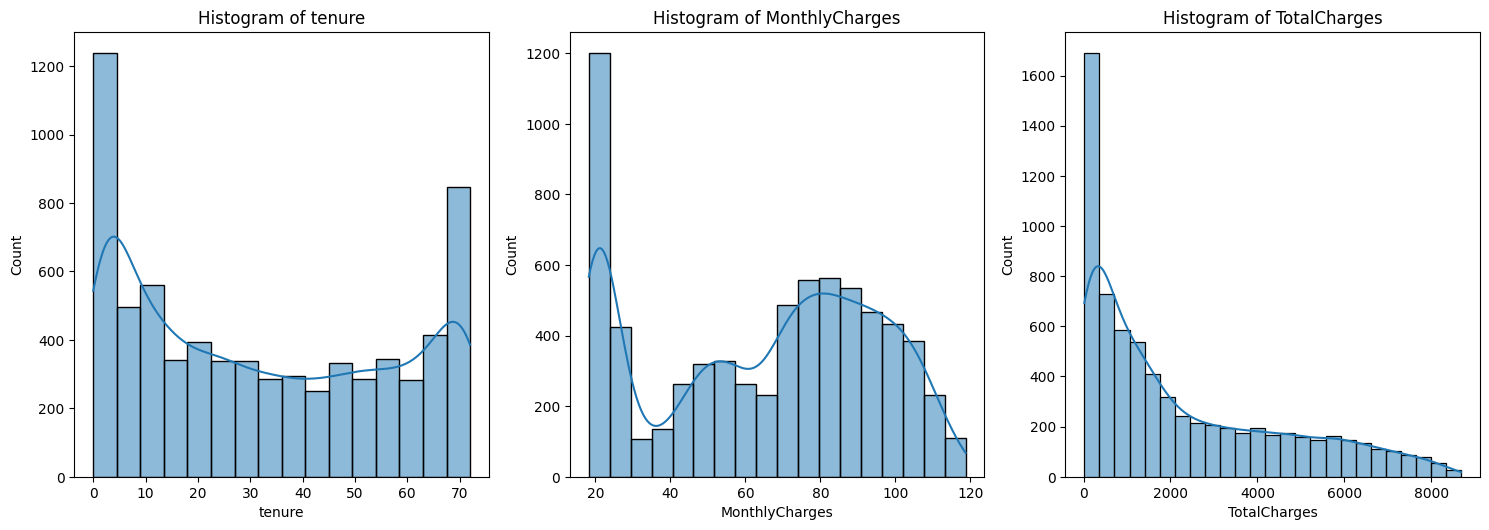

In [498]:
import seaborn as sns
import matplotlib.pyplot as plt

binary_variables = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(15, 10))
for i, var in enumerate(binary_variables):
    plt.subplot(2, 3, i + 1)  # Create subplots, adjust the grid if needed
    sns.histplot(df[var], kde=True)  # Add a Kernel Density Estimate (KDE) for better visualization
    plt.title(f'Histogram of {var}')  # Set title for each subplot
plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

From the distributions above, we can confirm our assumption that the TotalCharges variable is rightly skewed.

#### Distribution of Categorical Features

We will plot some of the categorical features agains the target variable 'Churn' using bar plots. We will also use contingency tables for some of the categorical features.

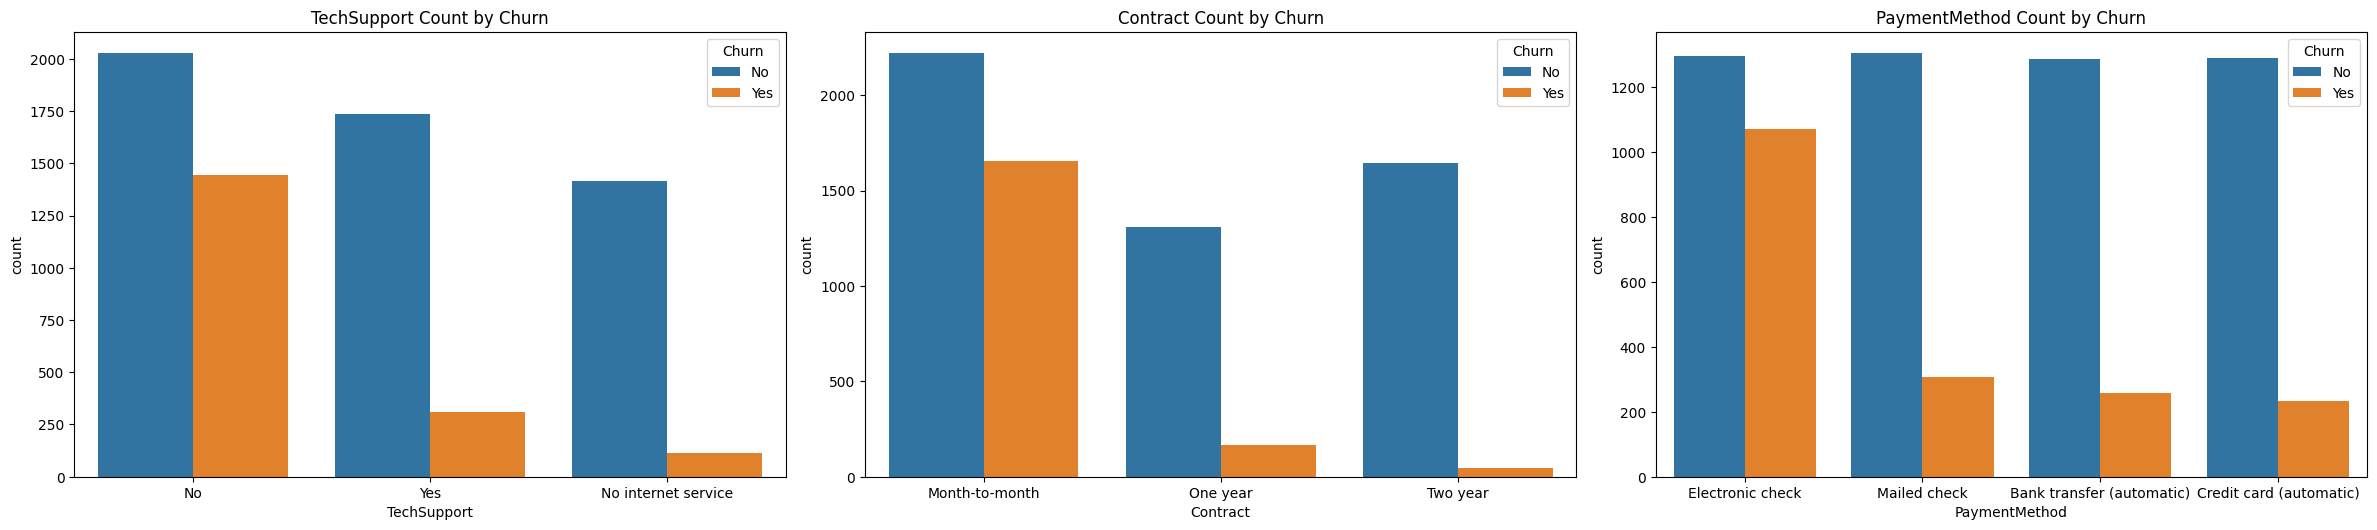

In [499]:
boxplot_vars = ['TechSupport', 'Contract', 'PaymentMethod']

plt.figure(figsize=(24, 10))
for i, var in enumerate(boxplot_vars):
    plt.subplot(2, 3, i + 1) 
    sns.countplot(x=var, hue='Churn', data=df)  
    plt.title(f'{var} Count by Churn') 
plt.tight_layout() 
plt.show()

In [500]:
from scipy.stats import chi2_contingency

# Separate categorical features
categorical_features = df.select_dtypes(include=['object']).columns.difference(['customerID', 'Churn'])

# Dictionary that will be used later to drop the columns with the lowest p-values when performing 
# feature selection
feature_p_val_dict = {}
# Create the contingency table
# Asked Claude Heroku for help to create the contingency table 
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['Churn'])

    # Add row and column totals
    contingency_table['Total'] = contingency_table.sum(axis=1)
    contingency_table.loc['Total'] = contingency_table.sum()

    # Perform chi-square test
    chi2, p_value, _, _ = chi2_contingency(contingency_table.iloc[:-1, :-1])
    feature_p_val_dict[feature] = p_value
    print(f"Contingency Table Count of {feature} vs Churn:")
    print(contingency_table)
    print(f"\nChi-square statistic: {chi2:.4f}")
    print(f"p-value: {p_value:.4f}")
    print("\n")

# Adding the SeniorCitizen column to the categorical features for the sake of creating contingency tables
contingency_table = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Add row and column totals
contingency_table['Total'] = contingency_table.sum(axis=1)
contingency_table.loc['Total'] = contingency_table.sum()

# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table.iloc[:-1, :-1])
feature_p_val_dict['SeniorCitizen'] = p_value
print(f"Contingency Table Count of SeniorCitizen vs Churn:")
print(contingency_table)
print(f"\nChi-square statistic: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")
print("\n")



Contingency Table Count of Contract vs Churn:
Churn             No   Yes  Total
Contract                         
Month-to-month  2220  1655   3875
One year        1307   166   1473
Two year        1647    48   1695
Total           5174  1869   7043

Chi-square statistic: 1184.5966
p-value: 0.0000


Contingency Table Count of Dependents vs Churn:
Churn         No   Yes  Total
Dependents                   
No          3390  1543   4933
Yes         1784   326   2110
Total       5174  1869   7043

Chi-square statistic: 189.1292
p-value: 0.0000


Contingency Table Count of DeviceProtection vs Churn:
Churn                  No   Yes  Total
DeviceProtection                      
No                   1884  1211   3095
No internet service  1413   113   1526
Yes                  1877   545   2422
Total                5174  1869   7043

Chi-square statistic: 558.4194
p-value: 0.0000


Contingency Table Count of InternetService vs Churn:
Churn              No   Yes  Total
InternetService          

As indicated by the chi-squared test, we can see that some of our feature variables have a relationship with the a target variable (where p<0.05 and chi-square statistic is high). It is interesting to see that PhoneService and Gender had a high p-value, indicating the absence of a relationship

### Correlation Analysis

To check for multicollinearity, we will use a correlation matrix (heatmap). Given that the matrix relies on numerical values, we will first need to encode our categorical variables. 

In [501]:
# Specify columns to exclude
exclude_columns = ['customerID']

# Separate categorical features that will be encoded later on
categorical_features = df.select_dtypes(include=['object']).columns.difference(exclude_columns)
# Get possible values for each categorical feature and visualize it in the console
feature_values = {feature: df[feature].unique() for feature in categorical_features}
for feature in feature_values.keys():
    print(feature + " -> " + str(feature_values[feature]))

Churn -> ['No' 'Yes']
Contract -> ['Month-to-month' 'One year' 'Two year']
Dependents -> ['No' 'Yes']
DeviceProtection -> ['No' 'Yes' 'No internet service']
InternetService -> ['DSL' 'Fiber optic' 'No']
MultipleLines -> ['No phone service' 'No' 'Yes']
OnlineBackup -> ['Yes' 'No' 'No internet service']
OnlineSecurity -> ['No' 'Yes' 'No internet service']
PaperlessBilling -> ['Yes' 'No']
Partner -> ['Yes' 'No']
PaymentMethod -> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
PhoneService -> ['No' 'Yes']
StreamingMovies -> ['No' 'Yes' 'No internet service']
StreamingTV -> ['No' 'Yes' 'No internet service']
TechSupport -> ['No' 'Yes' 'No internet service']
gender -> ['Female' 'Male']


For binary variables, we will perform an encoding in place where No is mapped to 0 and Yes is mapped to 1. 

For categorical variables with more than 2 values, we will perform one hot encoding. We will manually drop some of the columns it generates based on that value's frequency we found using the contingency tables.

In [502]:
#Separate categorical features into binary and non-binary features
binary_features = [col for col in categorical_features if len(df[col].unique()) == 2]
non_binary_features = [col for col in categorical_features if len(df[col].unique()) > 2]

#Create the mapping for each column
binary_map = {'Yes': 1, 'No': 0, 'Male': 0, 'Female': 1}

# Encode the binary features with the appropriate values given the encoding map
for feature in binary_features:
    df[feature] = df[feature].map(binary_map)

Note that when doing the one hot encoding, we are setting drop_first is set to False in order to preserve all the newly created columns. We will manually drop some of the columns using a function of predefined values to drop. 

Remember the goal here is to create accurate enough models that are interpretable, meaning we need to find a balance between complexity and interpretability.

In [503]:
def one_hot_encode_columns(df):
    # Perform one-hot encoding
    df_encoded = pd.get_dummies(df, columns=non_binary_features, drop_first=False)
    drop_categories = {
        'InternetService': ['No'],
        'OnlineBackup': ['No internet service'],
        'OnlineSecurity': ['No internet service'],
        'StreamingMovies': ['No internet service'],
        'StreamingTV': ['No internet service'],
        'TechSupport': ['No internet service'],
        'DeviceProtection': ['No internet service'],
        'MultipleLines': ['No phone service'],
        'Contract': ['One year']
    }
    
    # Drop unwanted columns
    columns_to_drop = []
    for feature, categories in drop_categories.items():
        for category in categories:
            column_to_drop = f"{feature}_{category}"
            if column_to_drop in df_encoded.columns:
                columns_to_drop.append(column_to_drop)
    
    df_encoded.drop(columns=columns_to_drop, inplace=True)
    return df_encoded

df_encoded = one_hot_encode_columns(df)

Correlation heatmap with binary and numeric feature values, which include the continuous variables as well as the binary features that were encoded as numeric. Note that this does not include the one hot encoded feature variables

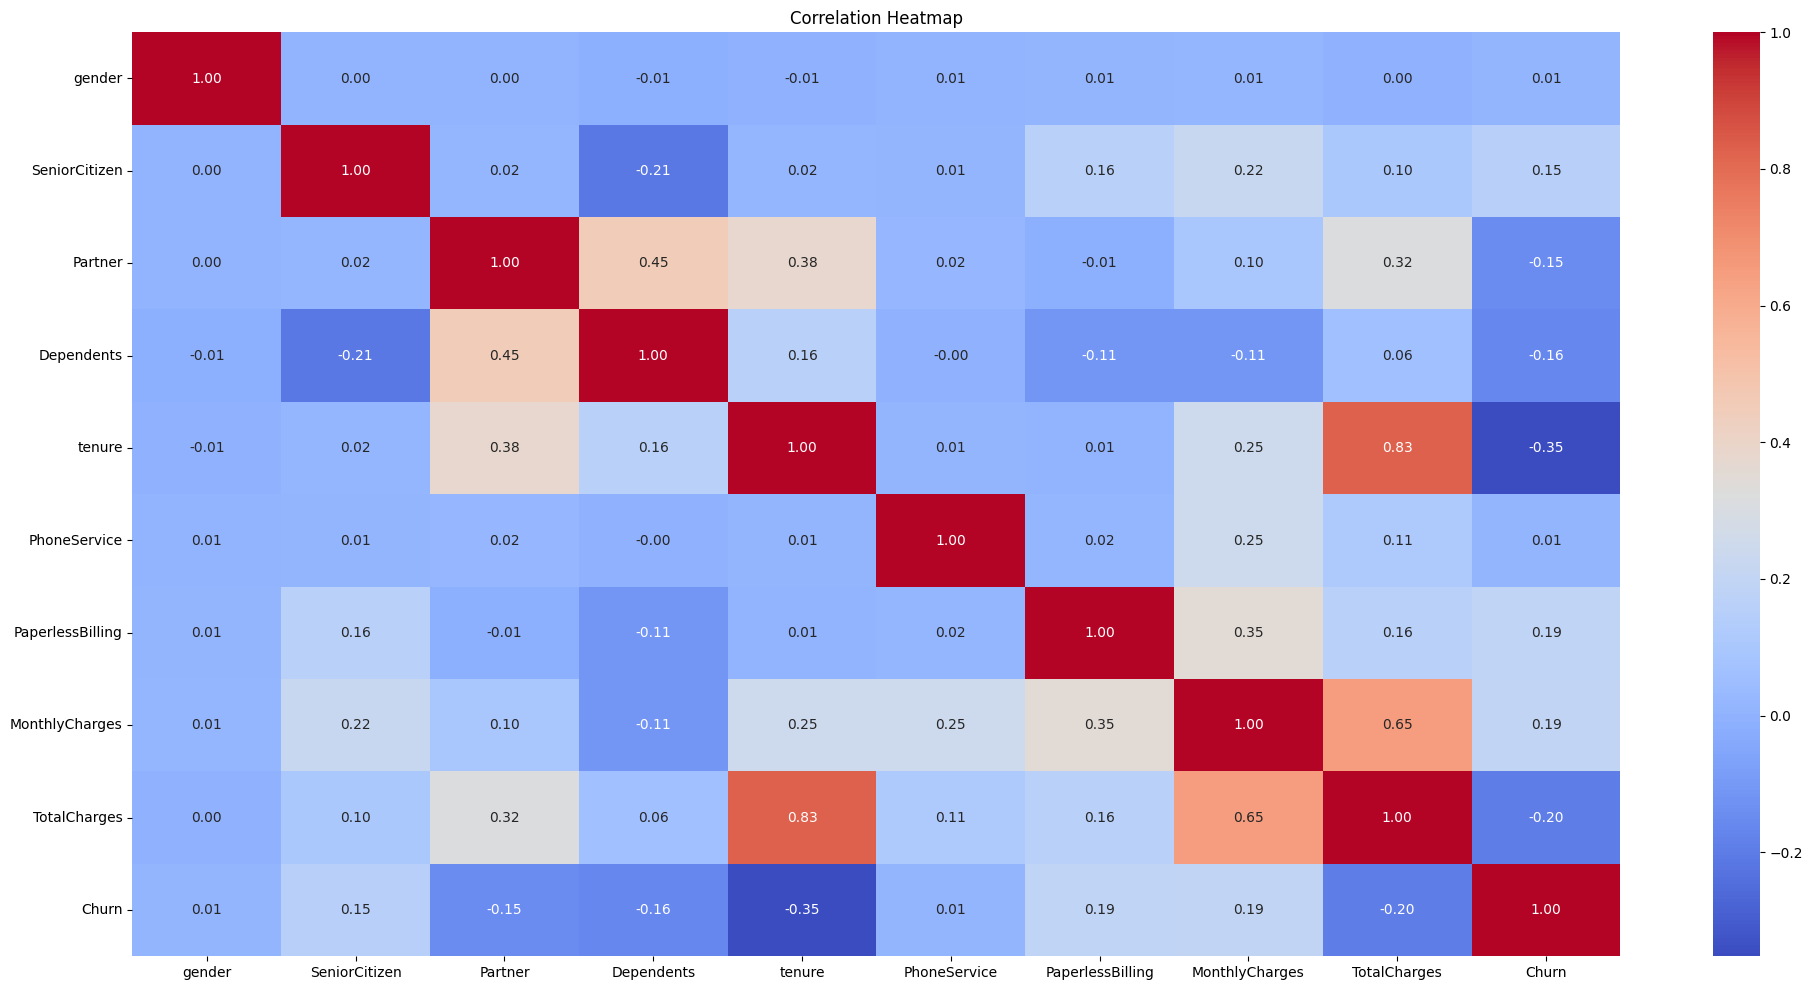

In [504]:
def print_correlation_heatmap(df):
    # Select only numeric columns for correlation analysis
    numeric_df = df.select_dtypes(include=[np.number])

    # Compute the correlation matrix
    corr_matrix = numeric_df.corr()
    # Plot the heatmap
    plt.figure(figsize=(24, 12))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()

#using the df not df_encoded to exclude the one_hot_encoded columns, but include the binary features
# that were encoded as numeric where 0 means No
print_correlation_heatmap(df)

In [505]:
# Function that changes all the boolean columns to numeric ones
def parse_bool_features_as_numeric(df):
    boolean_cols = df.select_dtypes(include=['bool']).columns
    df[boolean_cols] = df[boolean_cols].astype(int)
    return df

df_encoded = parse_bool_features_as_numeric(df_encoded)

Function that prints the heatmap for all columns by using the numeric columns and changing the dtype of the boolean features to numeric to include them in the heatmap

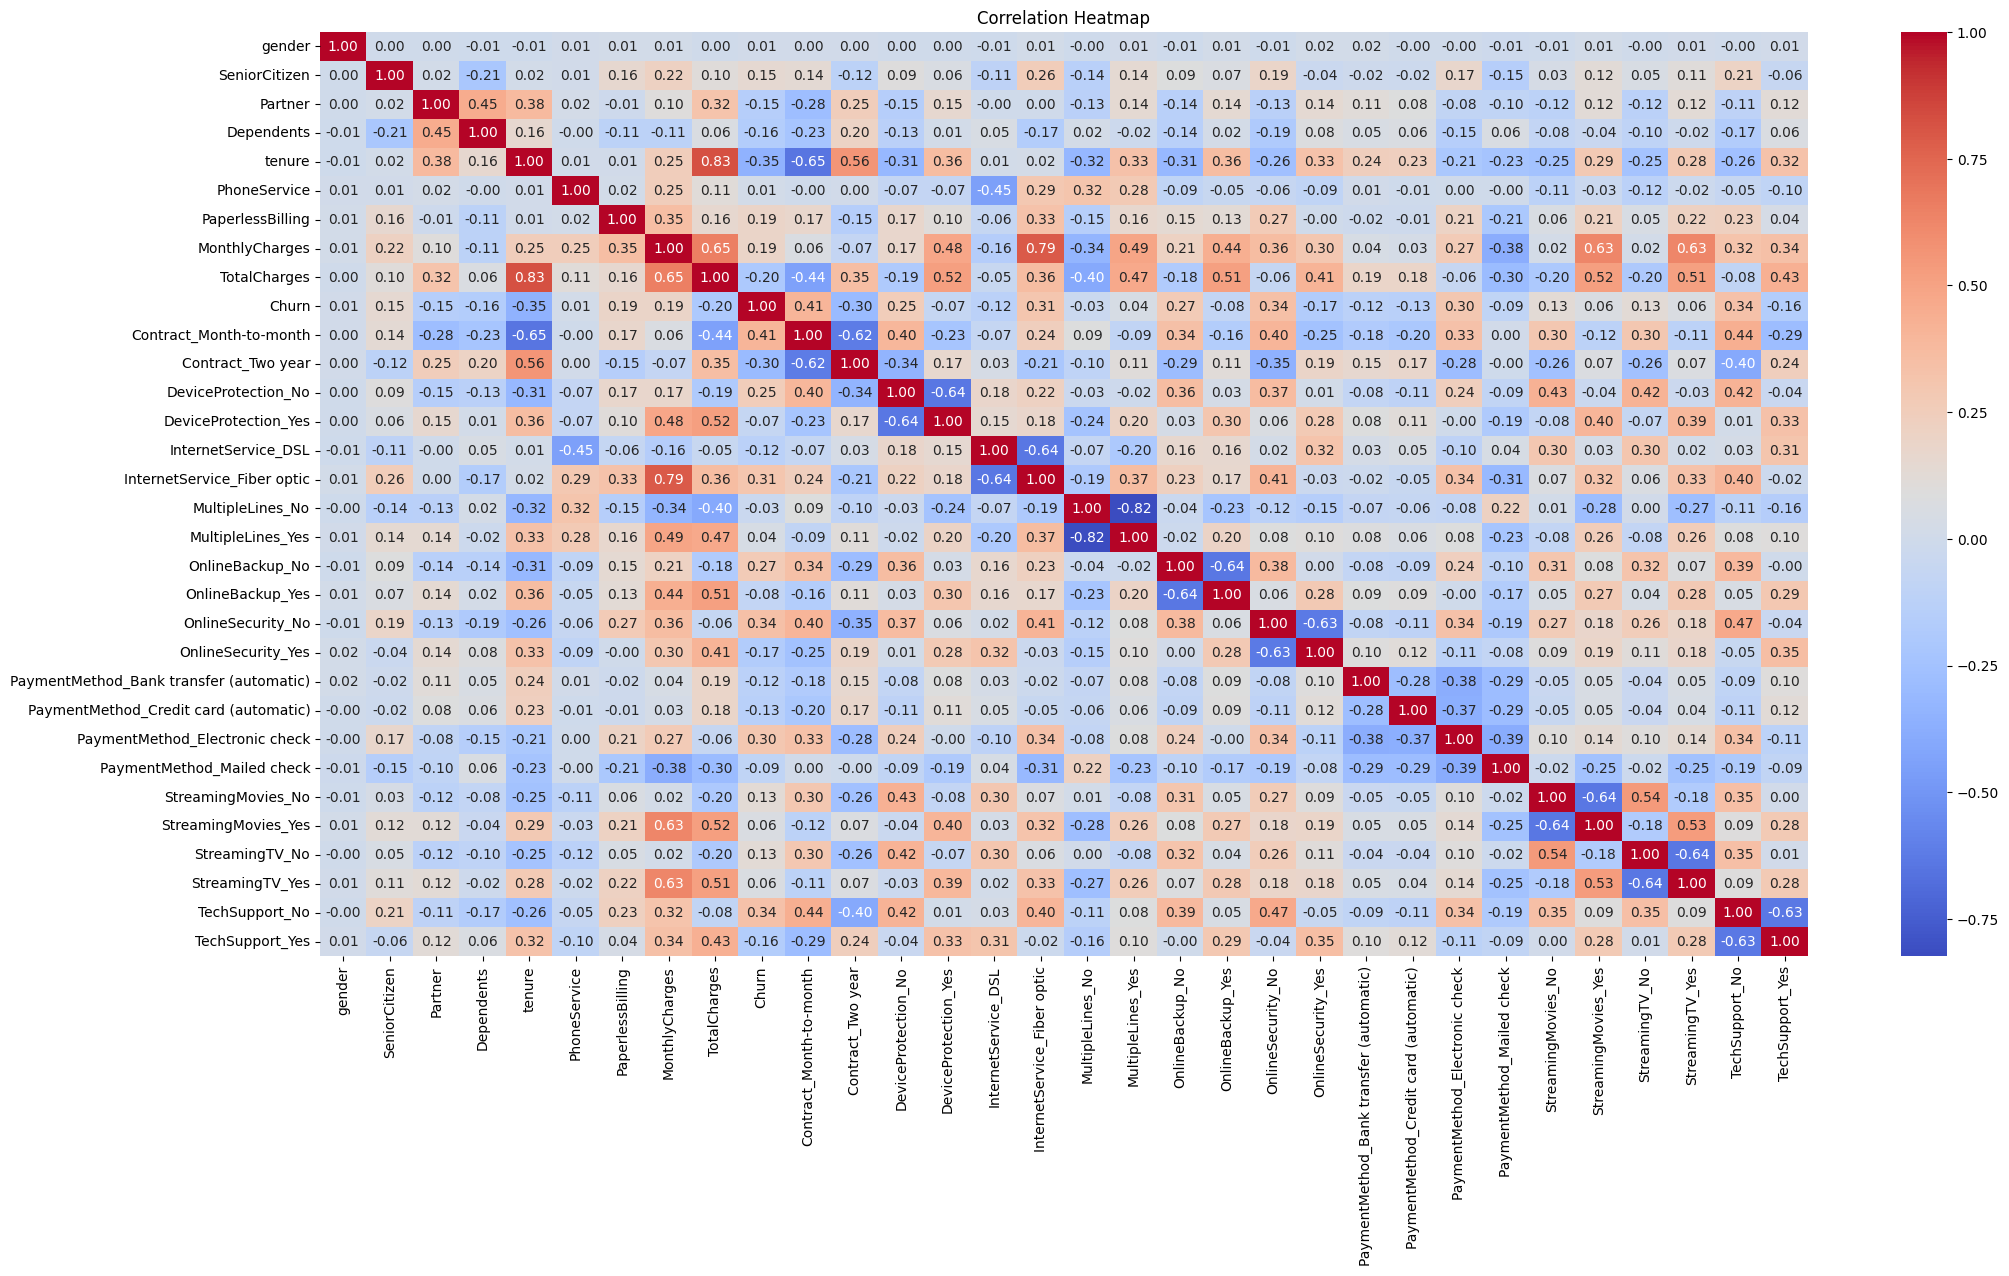

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   gender                                   7043 non-null   int64  
 2   SeniorCitizen                            7043 non-null   int64  
 3   Partner                                  7043 non-null   int64  
 4   Dependents                               7043 non-null   int64  
 5   tenure                                   7043 non-null   int64  
 6   PhoneService                             7043 non-null   int64  
 7   PaperlessBilling                         7043 non-null   int64  
 8   MonthlyCharges                           7043 non-null   float64
 9   TotalCharges                             7043 non-null   float64
 10  Churn                                    7043 no

In [506]:
print_correlation_heatmap(df_encoded)
print(df_encoded.info())

As we can see through the corellation matrix, our features show signs of multicollinearity. 

### Checking if Assumptions Were Met 

Since we have explored our dataset and uncovered some of the relationships between our feature variables and target, we can now check what assumptions were met. We will revisit some of these assumptions later on once we proceed with feature engineering/selection and actually create the models to plot the residuals

#### Linearity


In order to check if a linear relationship between features and the target variable exist, we will plot the relationship between some of the feature variables and the target variable

Index(['Dependents', 'MonthlyCharges', 'PaperlessBilling', 'Partner',
       'PhoneService', 'SeniorCitizen', 'TotalCharges', 'gender', 'tenure'],
      dtype='object')
9
21


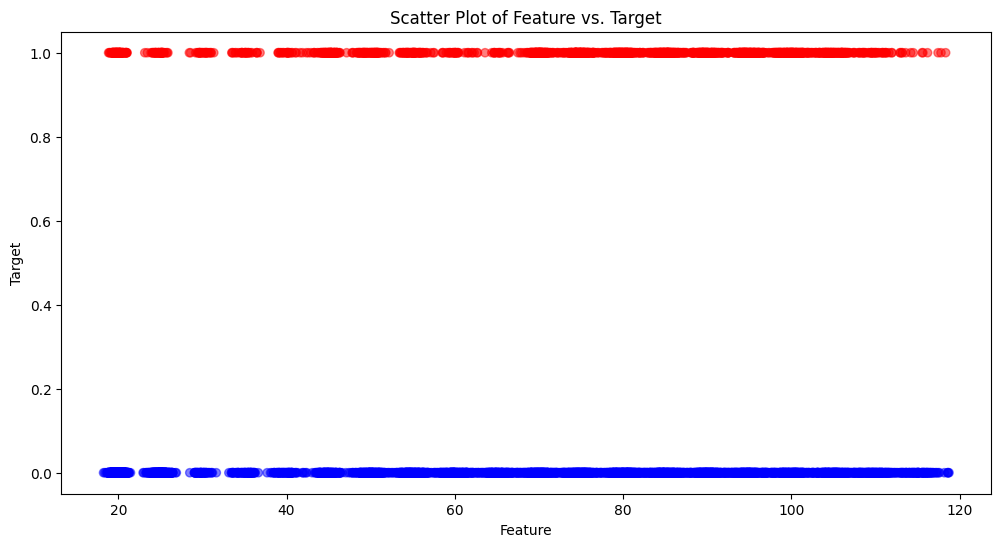

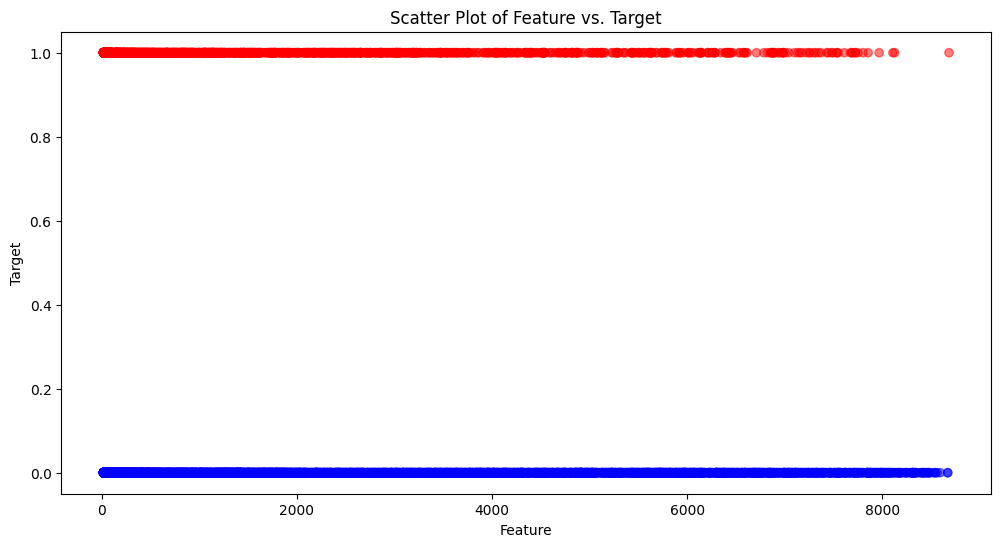

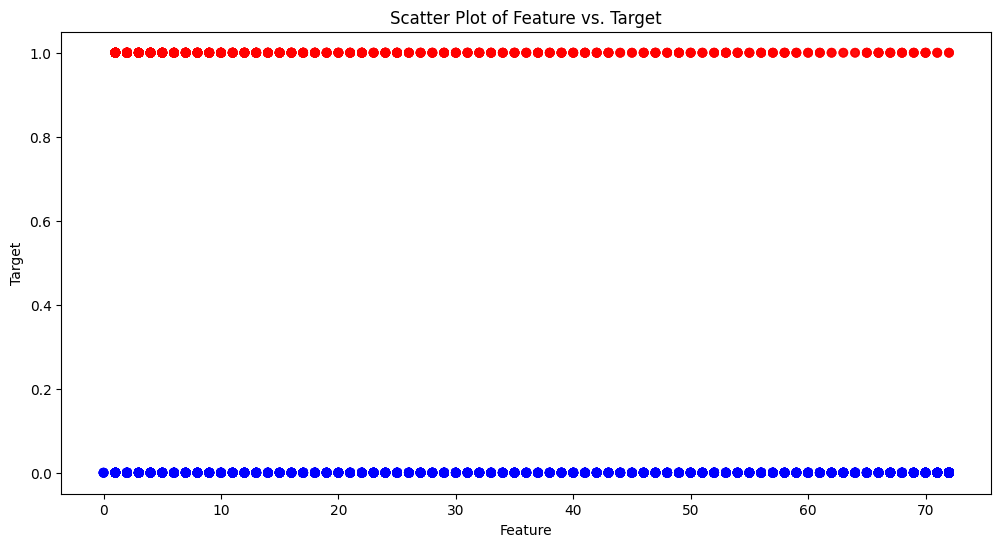

In [507]:
import seaborn as sns
import matplotlib.pyplot as plt

#Select all numerical features while excluding the target. The goal is to look for linearity 
#the features and the target
numerical_features = df.select_dtypes(include=[np.number]).columns.difference(['Churn'])
print(numerical_features)
print(len(numerical_features))
print(len(df.columns))

for feature in ['MonthlyCharges', 'TotalCharges', 'tenure']:
    plt.figure(figsize=(12, 6))
    plt.scatter(df[feature], df['Churn'], c=df['Churn'].map({0: 'blue', 1: 'red'}), alpha=0.5)
    plt.xlabel('Feature')
    plt.ylabel('Target')
    plt.title('Scatter Plot of Feature vs. Target')

        
    plt.show()
        


As stated here (https://bookdown.org/rwnahhas/RMPH/mlr-linearity.html), the linearity assumption is met by default since our target variable is binary. Therefore, we have confirmed that the linearity assumption is met.

#### Independence of Observations

After looking at the observations, representing a distinct customer each, it is reasonable to assume that they are independent

#### No Multicollinearity

As stated in our correlation analysis, our feature variables show multicollinearity. We will revisit this aassumption once we proceed with feature engineering/selection.

#### No Endogeneity

By looking at the dataset, one can see that all potential relevant variables are included in the dataset. However, given that we will be dropping some of our columns in order to achieve no multicollinearity. Therefore, it would be safe to check for this as we are training and test our model



#### No Autocorrelation

Since our dataset is static autocorrelation is not a major concern (unlike with time-series datasets)

#### Large Sample Size

In [508]:
print(df.shape)

(7043, 21)


Given the number of observations we have, it is safe to assume that this assumption was met

#### Absence of Perfect Separation

Given the information gathered through contingency tables and the bar plots for categorical features, we can see that there is no perfect separation, i.e none of our our predictors perfectly predicts our target.

#### Homoscedasticity (constant variance)

In order to check the Homoscedasticity, i.e that residuals are uncorrelated random variables with 0 mean and constant variance, we will first create a regression model and check for our assumption later on

#### Normality

The residuals of the model should be normally distributed. We will check if the assumption was met once we create our models and plot the residuals.

Since we have explored our dataset and uncovered some relationships between our feature variables and our target variables, we can start our feature selection/feature engineering.

### Feature Engineering/Selection 

We can start by dropping the features with a lot p-value since they don't have a relationship with the target variable

In [509]:
# columns_to_drop = []
# for feature in feature_p_val_dict:
#     if feature_p_val_dict[feature] > 0.05: #drop features that have p-value > 0.05
#         columns_to_drop.append(feature)

# print(columns_to_drop)
# df.drop(columns=columns_to_drop, inplace=True)

['PhoneService', 'gender']


Drop the total charges since we can find it from the data (tenure * monthly charges)

In [510]:
df_encoded.drop(columns=['TotalCharges'], inplace=True)

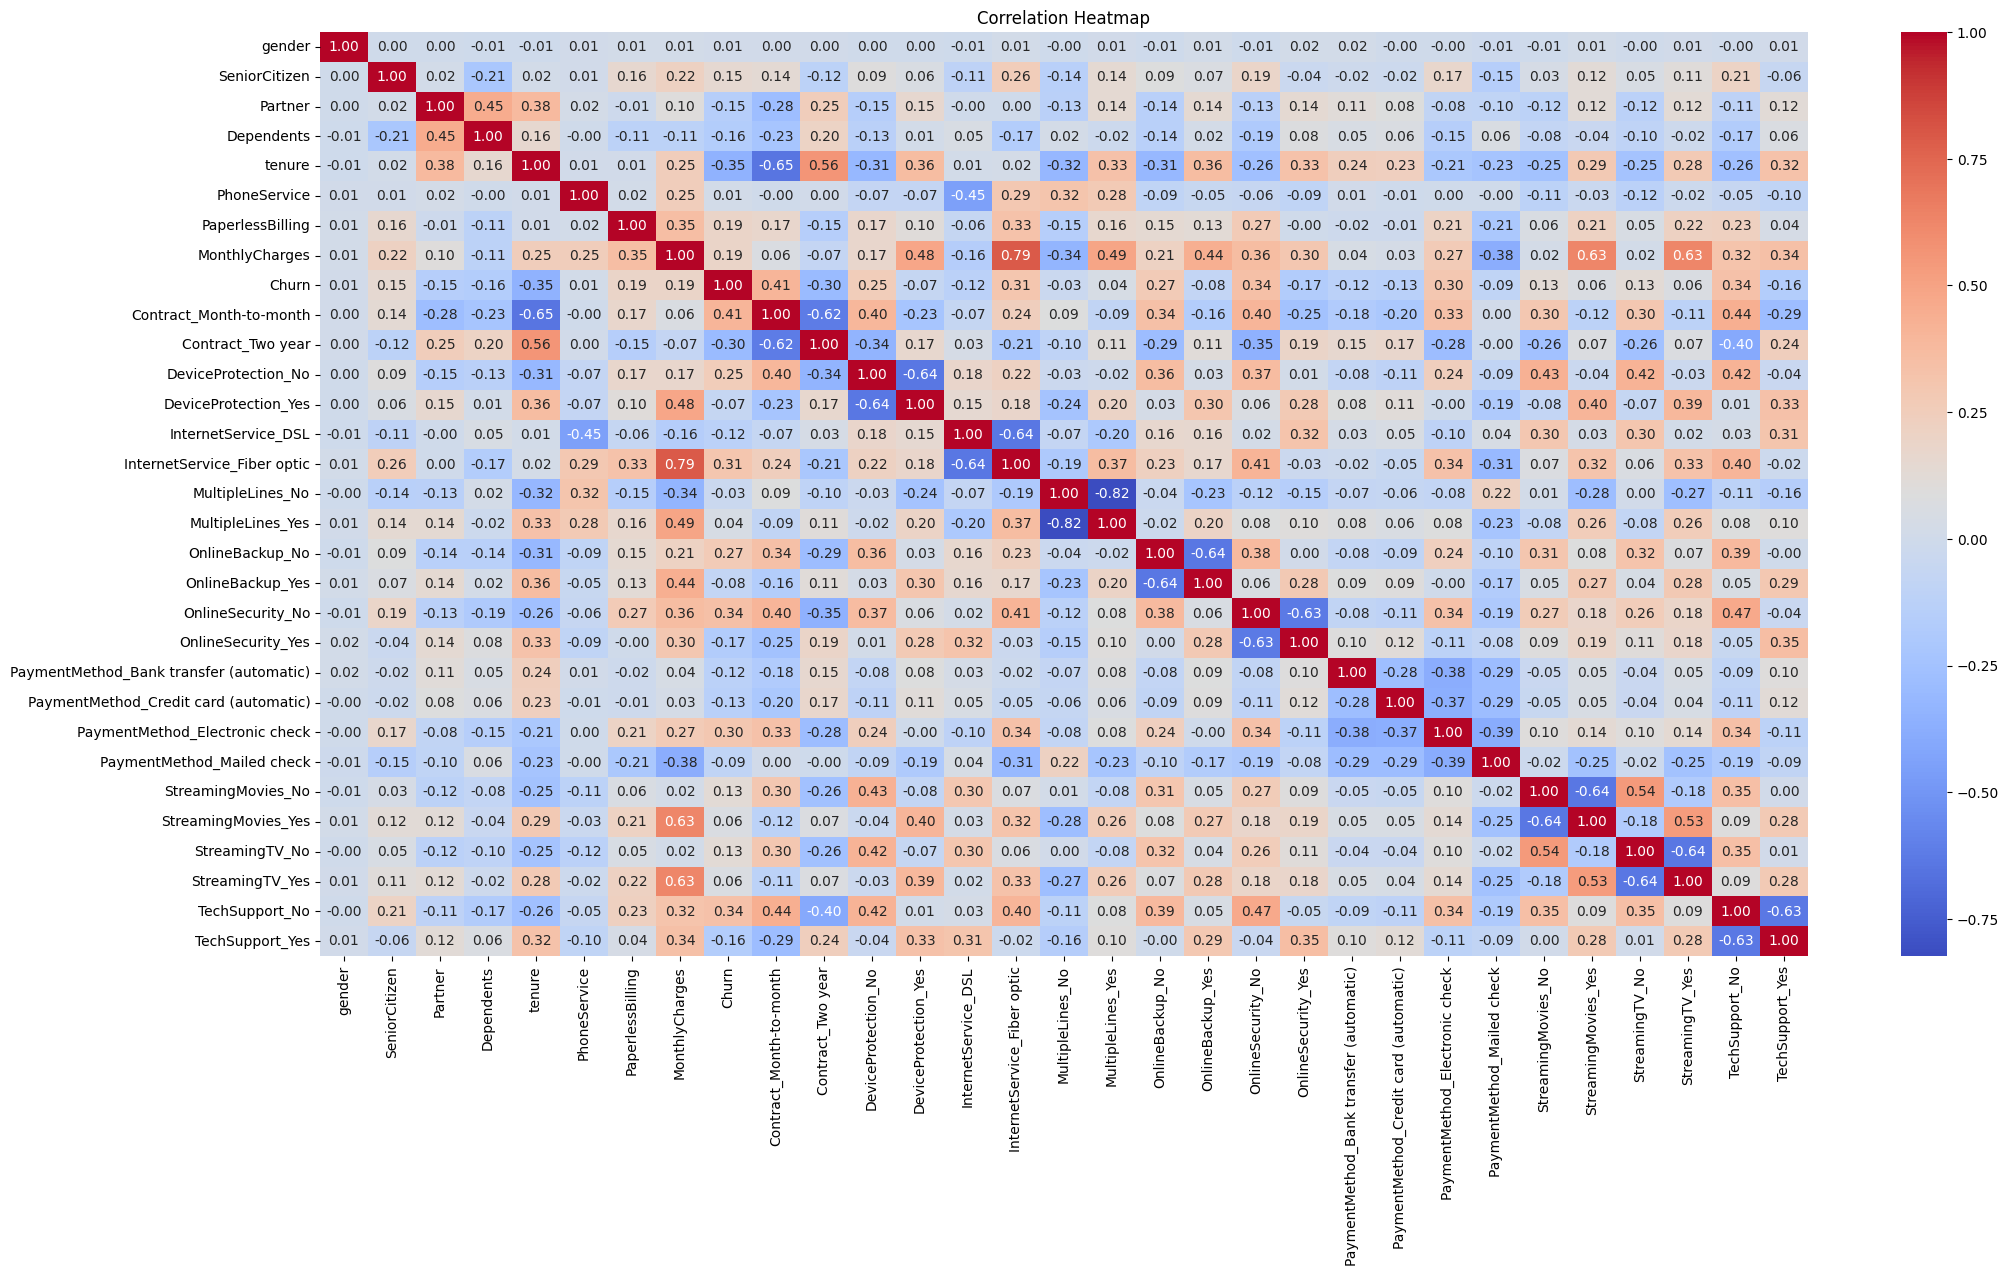

In [511]:
print_correlation_heatmap(df_encoded)

Since the monthly charges are correlated to the services the customer is signed up for, we can drop the monthly charges as we can infer it from the number of services the customer is signed up for. 

Since streaming movies and TV are also correlated, we should drop one of the columns, in this case streaming movies. Most users that are streaming TV, are streaming movies. 

Lastly, we will drop the column DSL representing the value DSL for the Internet Service. Keeping the optical fiber feature makes more since it affects the monthly charges, and would still allow us to see whether the customer has internet

In [512]:
df_encoded.drop(columns=['MonthlyCharges', 'StreamingMovies_Yes'], inplace=True)
# df_encoded.drop(columns=['StreamingMovies_Yes'], inplace=True)

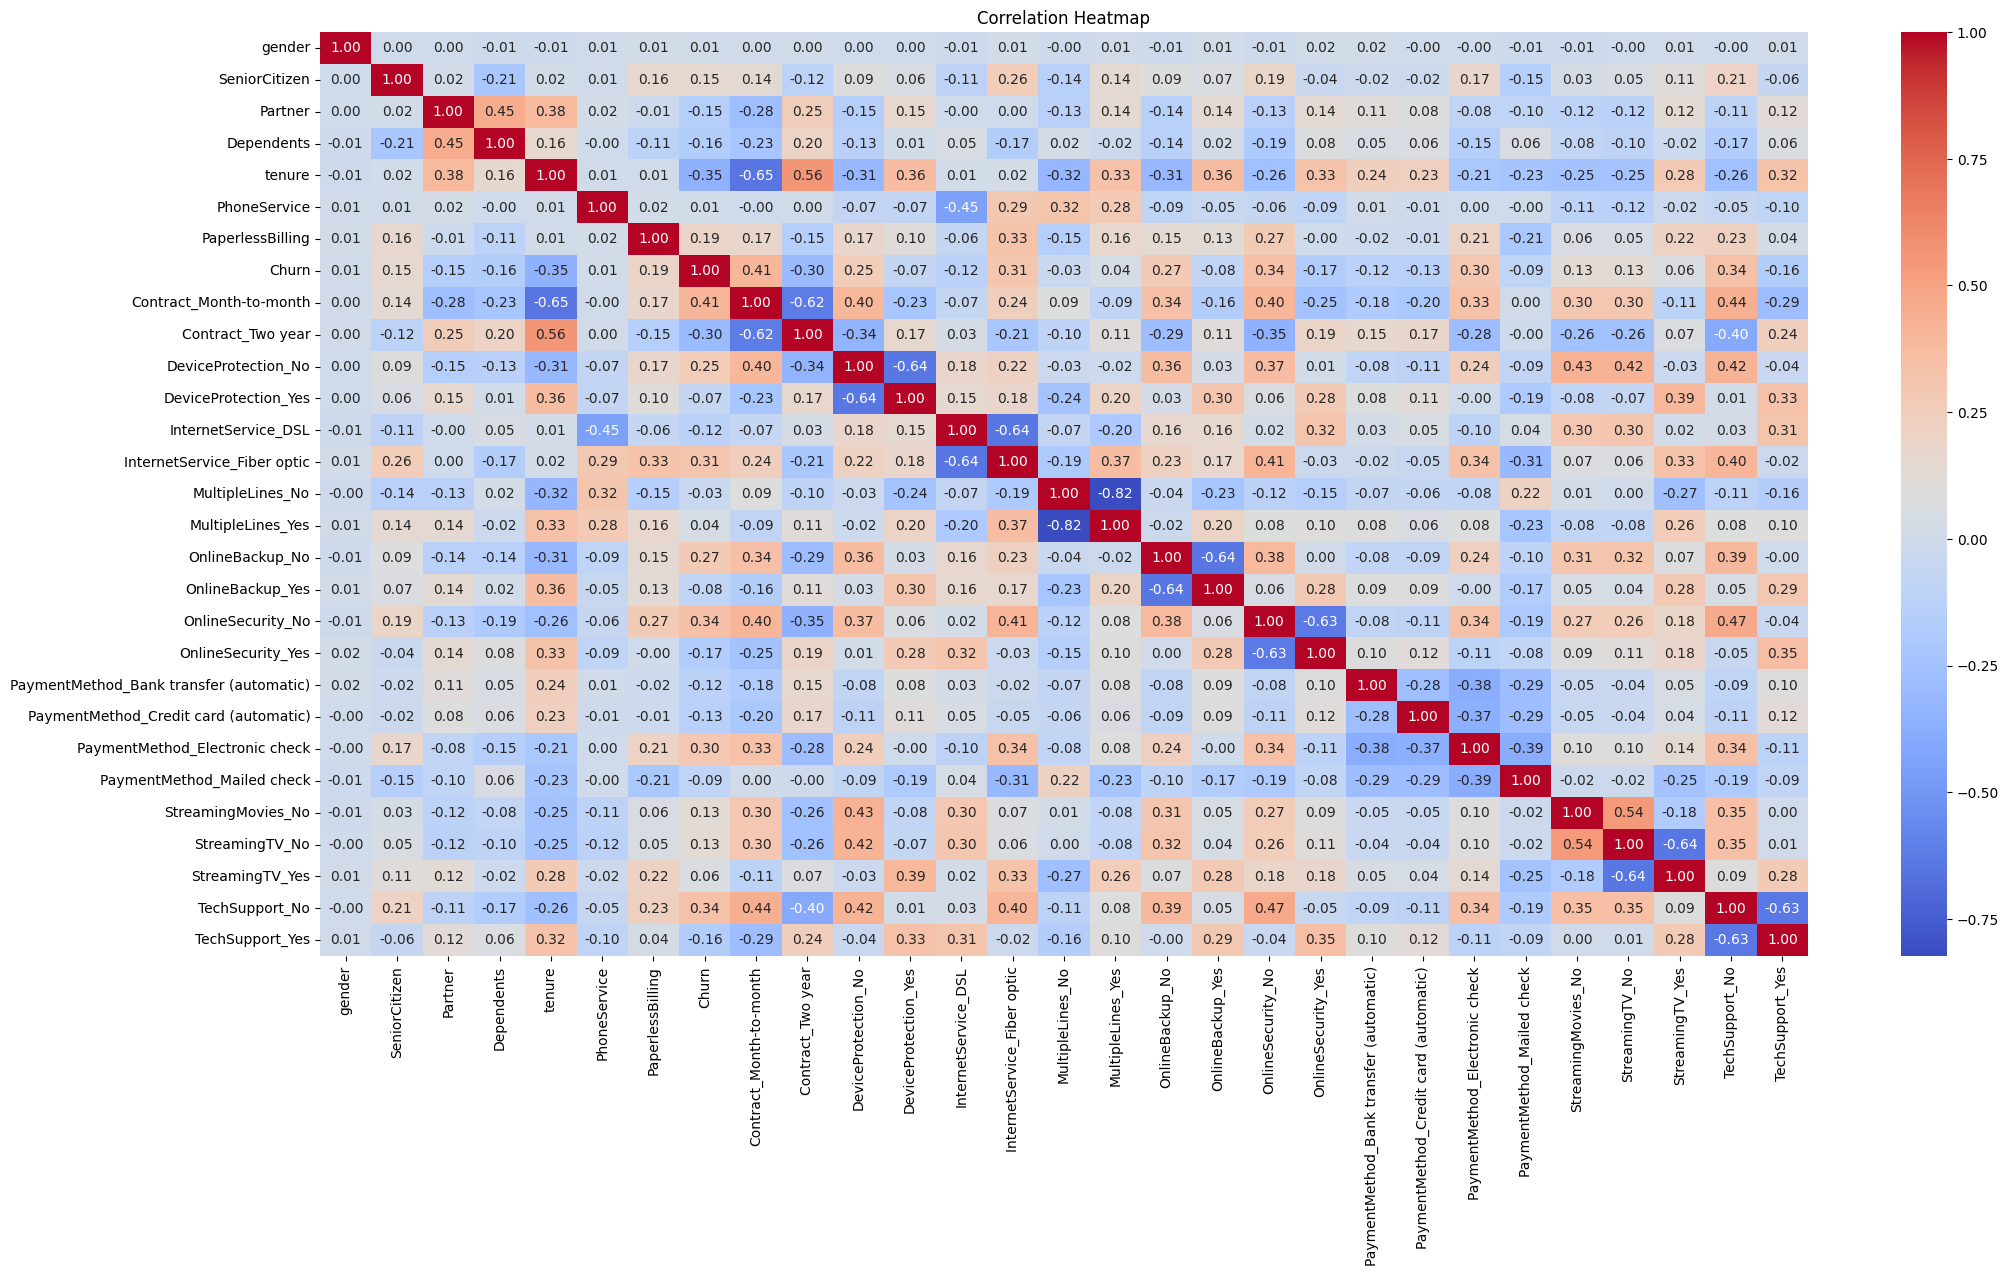

In [513]:
print_correlation_heatmap(df_encoded)

Change the contracts to reflect the number of months as to decrease the colinearity with the tenure

In [514]:
df_encoded.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling', 'Churn',
       'Contract_Month-to-month', 'Contract_Two year', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'MultipleLines_No', 'MultipleLines_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'StreamingMovies_No', 'StreamingTV_No', 'StreamingTV_Yes',
       'TechSupport_No', 'TechSupport_Yes'],
      dtype='object')

In [515]:
df_encoded['AutomaticPayment'] = df_encoded.apply(lambda row: 1 if row['PaymentMethod_Bank transfer (automatic)'] else 1 if row['PaymentMethod_Credit card (automatic)'] else 0, axis=1)
df_encoded.drop(columns=['PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check', 'PaymentMethod_Electronic check'], inplace=True)

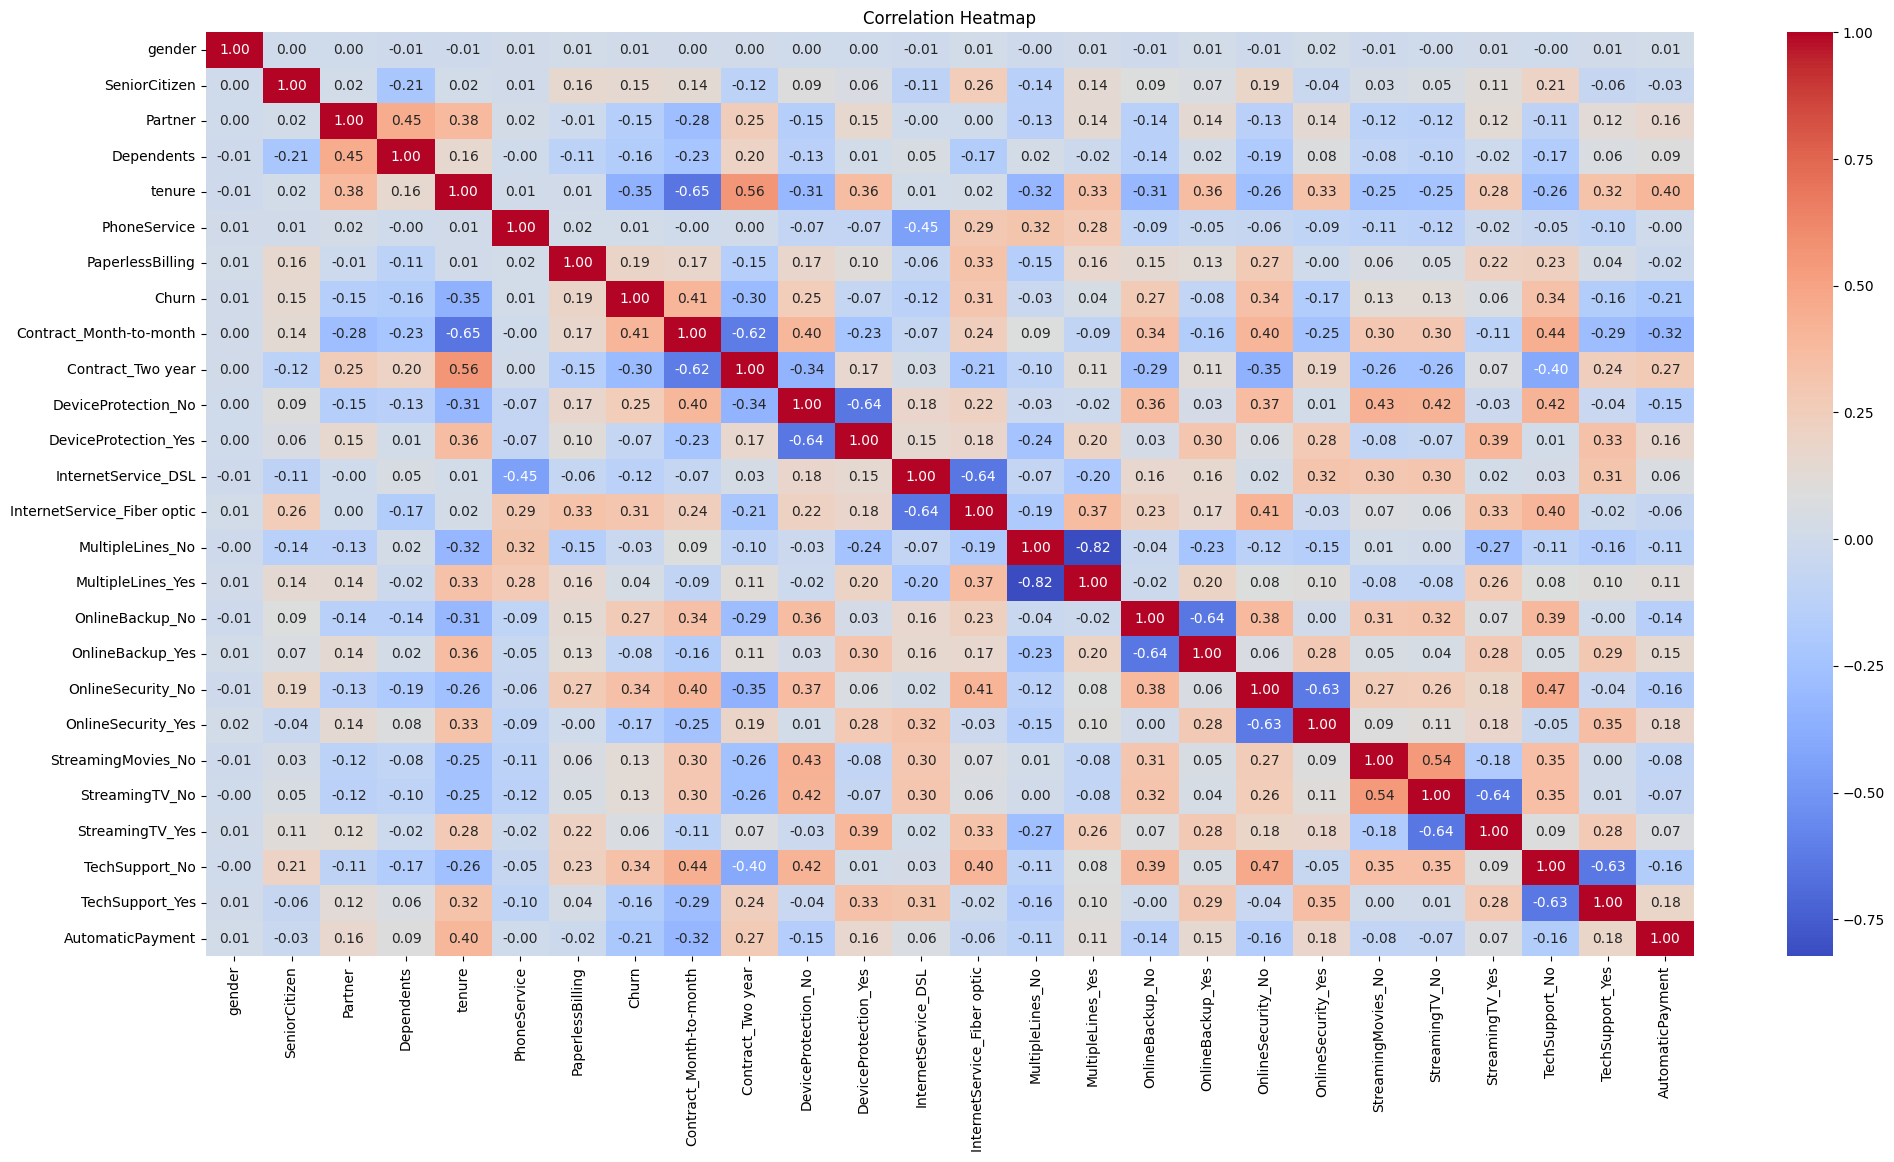

In [516]:
print_correlation_heatmap(df_encoded)

# Modeling

In [518]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

In [519]:
target = 'Churn'
X = df_encoded.drop(columns=[target, 'customerID'])
y = df_encoded[target]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression


This function will be used to evaluate the linear regression model using metrics like MSE and R^2. 

The code for the evalutation function, residuals plotting, and using the Ridge Regression was inspired from this notebook provided by Dr.Brinnae Bent (Source: https://github.com/AIPI-590-XAI/Duke-AI-XAI/blob/main/interpretable-ml-example-notebooks/regression-interpretability.ipynb)

In [520]:
def evaluate_linear_regression_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n{model_name}:")
    print(f"MSE: {mse:.2f}")
    print(f"R2 Score: {r2:.2f}")
    
    coefficients = model.coef_
    coef_df = pd.DataFrame({'Predictor': X.columns, 'Coefficient': coefficients})
    coef_df = coef_df.sort_values('Coefficient', ascending=True)
  
    return model, y_pred, coef_df

Let's run the function, which trains the model and evaluates it. It also prints the different coefficients the model has assigned to each feature variable.

In [521]:
lr_model, lr_y_pred, coef_df = evaluate_linear_regression_model(LinearRegression(), X_train, X_test, y_train, y_test, "Linear Regression")
print(coef_df)


Linear Regression:
MSE: 0.14
R2 Score: 0.30
                      Predictor  Coefficient
19           StreamingMovies_No    -0.047713
11          InternetService_DSL    -0.043287
24             AutomaticPayment    -0.040112
13             MultipleLines_No    -0.035719
5                  PhoneService    -0.030486
3                    Dependents    -0.023716
18           OnlineSecurity_Yes    -0.010470
23              TechSupport_Yes    -0.006519
4                        tenure    -0.004326
14            MultipleLines_Yes     0.005232
16             OnlineBackup_Yes     0.007132
2                       Partner     0.008093
0                        gender     0.009213
20               StreamingTV_No     0.014254
10         DeviceProtection_Yes     0.019907
8             Contract_Two year     0.032435
9           DeviceProtection_No     0.037997
1                 SeniorCitizen     0.042565
21              StreamingTV_Yes     0.043651
6              PaperlessBilling     0.049514
15        

In [522]:
ridge_model, ridge_pred, ridge_coef_df = evaluate_linear_regression_model(Ridge(alpha=1.0), X_train, X_test, y_train, y_test, "Ridge Regression")
print(ridge_coef_df)
print('\n')


Ridge Regression:
MSE: 0.14
R2 Score: 0.30
                      Predictor  Coefficient
19           StreamingMovies_No    -0.047629
11          InternetService_DSL    -0.043266
24             AutomaticPayment    -0.040089
13             MultipleLines_No    -0.035699
5                  PhoneService    -0.030418
3                    Dependents    -0.023716
18           OnlineSecurity_Yes    -0.010482
23              TechSupport_Yes    -0.006530
4                        tenure    -0.004326
14            MultipleLines_Yes     0.005282
16             OnlineBackup_Yes     0.007126
2                       Partner     0.008081
0                        gender     0.009208
20               StreamingTV_No     0.014232
10         DeviceProtection_Yes     0.019898
8             Contract_Two year     0.032290
9           DeviceProtection_No     0.037981
1                 SeniorCitizen     0.042545
21              StreamingTV_Yes     0.043646
6              PaperlessBilling     0.049514
15         

<Figure size 1200x600 with 0 Axes>

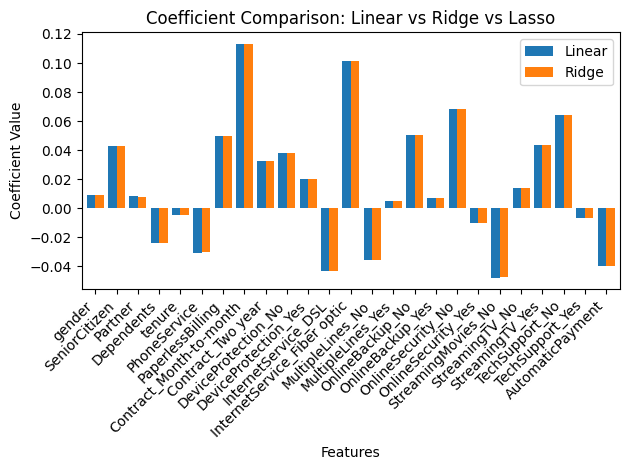

In [523]:
# Coefficient Comparison Plot
def plot_coefficients(lr_model, ridge_model):
    coef_df = pd.DataFrame({
        'Linear': lr_model.coef_,
        'Ridge': ridge_model.coef_,
    }, index=X.columns)

    plt.figure(figsize=(12, 6))
    coef_df.plot(kind='bar', width=0.8)
    plt.title('Coefficient Comparison: Linear vs Ridge vs Lasso')
    plt.xlabel('Features')
    plt.ylabel('Coefficient Value')
    plt.legend(loc='best')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_coefficients(lr_model, ridge_model)

### Plot Residuals

Let's use a QQ plot and check for the Normality assumption 

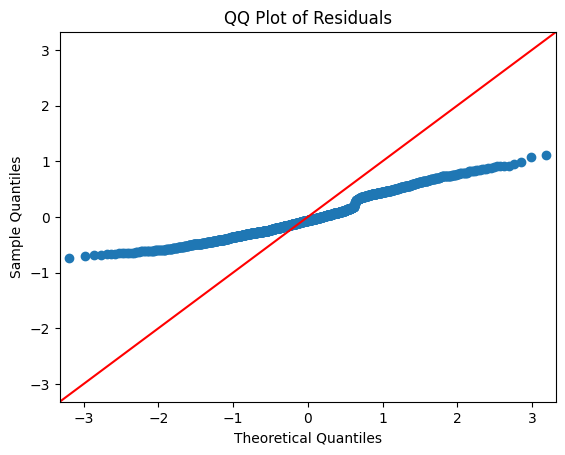

In [524]:
import statsmodels.api as sm
# Get the residuals (observed - predicted)
residuals = y_test - lr_y_pred

# QQ Plot
sm.qqplot(residuals, line='45')
plt.title("QQ Plot of Residuals")
plt.show()

As we can see here, the residualts deviate significantly from the line (especially at the tails). This suggests that the residuals may not be normally distributed, indicating a violation of the normality assumption.

Let's now use the Breusch–Pagan Test to check for Homoscedasticity. I learned about the existence and significance of this test by asking Claude Heroku. The code for this test was written with the help of Claude Heroku.

The Breusch–Pagan test checks if the residuals of a model have constant variance (homoscedasticity). In other words, it tests whether the residuals’ variance depends on the values of the predictor variables.

In [525]:
from statsmodels.stats.diagnostic import het_breuschpagan
# Breusch-Pagan test
# Add constant to features matrix (X)
X_test_with_const = sm.add_constant(X_test)

# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(residuals, X_test_with_const)

# The test returns four values:
# Lagrange Multiplier statistic, p-value, f-value, and f p-value
lm_stat, lm_pvalue, f_stat, f_pvalue = bp_test

print(f"Lagrange Multiplier p-value: {lm_pvalue}")
print(f"F-statistic p-value: {f_pvalue}")

Lagrange Multiplier p-value: 1.0305413753598598e-58
F-statistic p-value: 1.9519938374497386e-72


Since the p-values are extremely small (<0.05), we can assume that heteroscedasticity is present (i.e., the variance of residuals is not constant), thereby violating our assumption of homoscedasticity. 

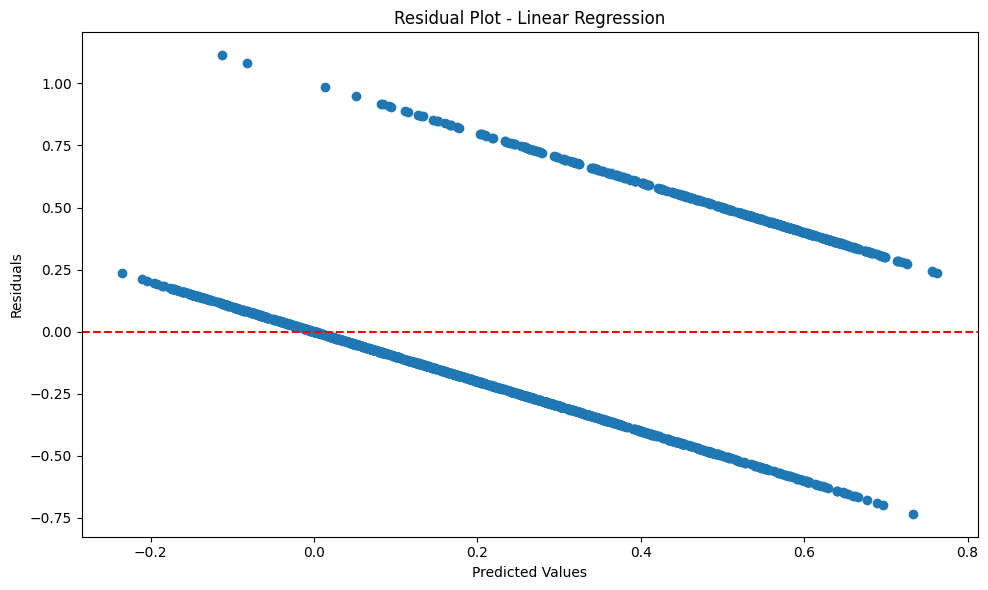

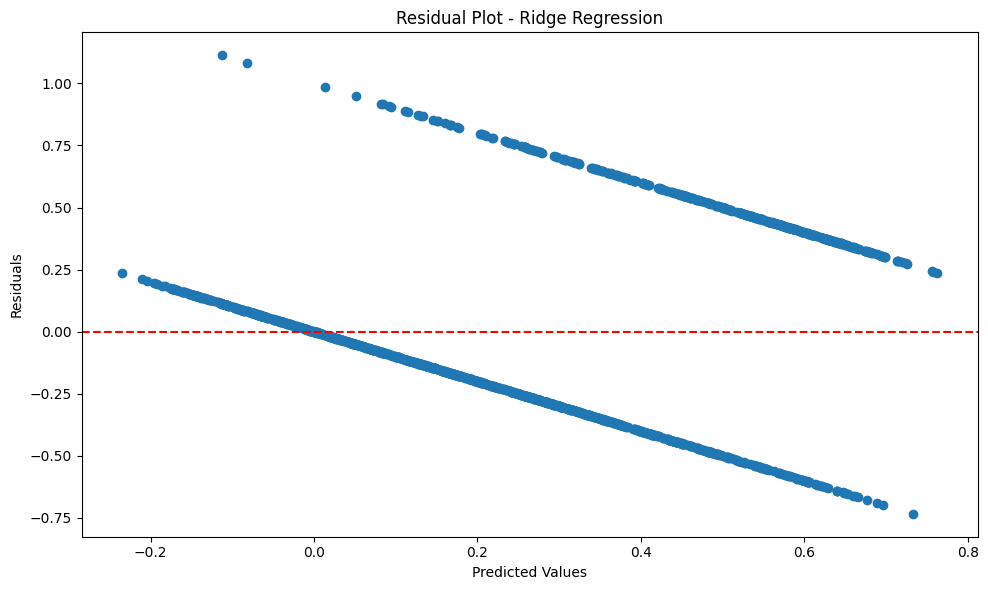

In [526]:
# Residual Plot
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot - {model_name}')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.tight_layout()
    plt.show()

plot_residuals(y_test, lr_y_pred, 'Linear Regression')
plot_residuals(y_test, ridge_pred, 'Ridge Regression')

#### Interpeting the results and coefficients for Linear Regression

Our linear regression model did not do that well, which is understandable given that our target variable is binary. 

In fact, the r^2 value is 0.30, meaning our model was only able to capture 30% of the variance of the target variable, which is not great for generalization.

Our MSE is 0.18 is fairly low in absolute terms. However, given that we are treating our target value as a continuous variable (a range of 0 to 1), it is safe to say that the value of 0.18 for the MSE indicates a fairly high error. 

In order to analyze our coefficients, let's look at the positive and negative coefficients: 
- Positive Coefficients: We know that features with positive coefficients increase the likelihood of Churn as their values increase
    - Contract_Month-to-Month with a coefficient of 0.113 suggests that customers with a month-to-month contract are more likely to churn than those on longer contracts (one-year and two-year contracts)
    - InternetService_Fiber optic with a coefficient of 0.101192 suggests that customers with a Fiber optic service are more likely to churn than those with no internet service or those with DSL. This is a bit unexpected given that using optical fiber is much better in terms of internet quality. This may raise questions around the performance of the optical fiber service and/or its pricing by the company. 
    - PaperlessBilling with a coefficient 0.049514 (lowest positive coefficient) indicates that customers that opted to PaperlessBilling are more likely to churn, which is unexpected to some extent, given that it facilitates reviewing the bills and that most of users are not senior citizens, in which case they might like to receive their bills ("old school")
    - It is important to note that our model assigned OnlineBackup_Yes a positive coefficient, meaning those that use online backups are more likely to churn. This raises questions about our feature selection or how good the online backup service the company offers is (or maybe its pricing as well). The model also assigned OnlineBackup_No a positive coefficient, which definitely raises questions about how well our model is performing (even though the coefficient's value is really close to 0)

- Negative Coefficients
    - Our model assigned TechSupport_Yes a negative coefficient, which is understandable. We expect customers that receive tech support would have an overall better experience and would likely stay with the company (i.e won't churn)
    - StreamingMovies_No with a coefficient of -0.047 indicates that customers who don’t use the streaming movies service are less likely to churn.
    - InternetService_DSL with a coefficient of -0.043287 is aligned with the fact that the model is assigned a positive coefficient to InternetService_Fiber Optic.

- Some features like gender and tenure have really small coefficients (close to zero) indicating little to no impact on customers churning in our model
- Overall, most of our coefficients are relatively small, indicated a weak linear relationship between them and the target value

### Actual vs Predicted Plot

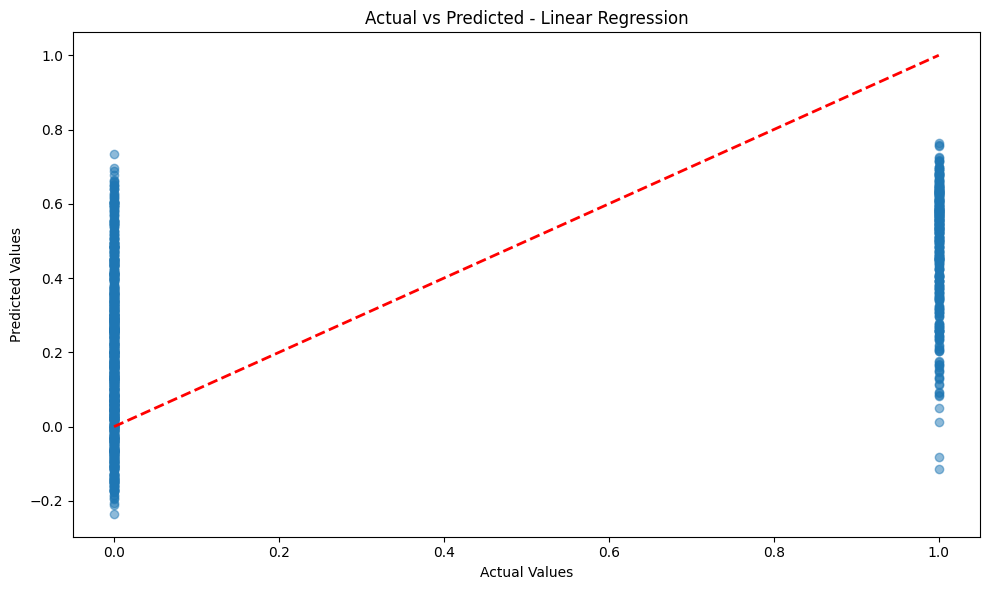

In [527]:
# Actual vs Predicted Plot
def plot_actual_vs_predicted(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted - {model_name}')
    plt.tight_layout()
    plt.show()

plot_actual_vs_predicted(y_test, lr_y_pred, 'Linear Regression')

## Logistic Regression

In [528]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

This function will be used to evaluate the linear regression model using metrics like Accuracy Score, Precision, Recall

The code for this function was inspired from this notebook provided by Dr.Brinnae Bent (Source: https://github.com/AIPI-590-XAI/Duke-AI-XAI/blob/main/interpretable-ml-example-notebooks/regression-interpretability.ipynb)

In [529]:
def evaluate_logistic_regression_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)  
    acc_score = accuracy_score(y_test,y_pred) 
    
    print(f"\n{model_name}:")
    print(f"Precision: {precision:.3f}")
    print(f"Recall Score: {recall:.3f}")
    print(f"Accuracy Score: {acc_score:.3f}")
    
    coefficients = model.coef_[0]
    coef_df = pd.DataFrame({'Predictor': X.columns, 'Coefficient': coefficients})
    coef_df = coef_df.sort_values('Coefficient', ascending=True)
  
    return model, y_pred, coef_df

In [530]:
model = LogisticRegression(penalty='none')

In [531]:
logistic_reg_model, logistic_y_pred, logisitic_coef_df = evaluate_logistic_regression_model(model, X_train_scaled, X_test_scaled, y_train, y_test, 'Logistic Regression')
print(logisitic_coef_df)


Logistic Regression:
Precision: 0.690
Recall Score: 0.590
Accuracy Score: 0.821
                      Predictor  Coefficient
4                        tenure    -0.790550
8             Contract_Two year    -0.330729
19           StreamingMovies_No    -0.172588
24             AutomaticPayment    -0.137882
11          InternetService_DSL    -0.118519
13             MultipleLines_No    -0.102573
5                  PhoneService    -0.099660
3                    Dependents    -0.084422
18           OnlineSecurity_Yes     0.003216
23              TechSupport_Yes     0.023296
0                        gender     0.026553
2                       Partner     0.033363
14            MultipleLines_Yes     0.043694
20               StreamingTV_No     0.052674
1                 SeniorCitizen     0.064066
16             OnlineBackup_Yes     0.074701
10         DeviceProtection_Yes     0.110752
9           DeviceProtection_No     0.114866
15              OnlineBackup_No     0.149241
6              Pape

/Users/ahmedboutar/Desktop/Duke/Fall2024/AIPI590/assginment-3/interpretable-ml/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


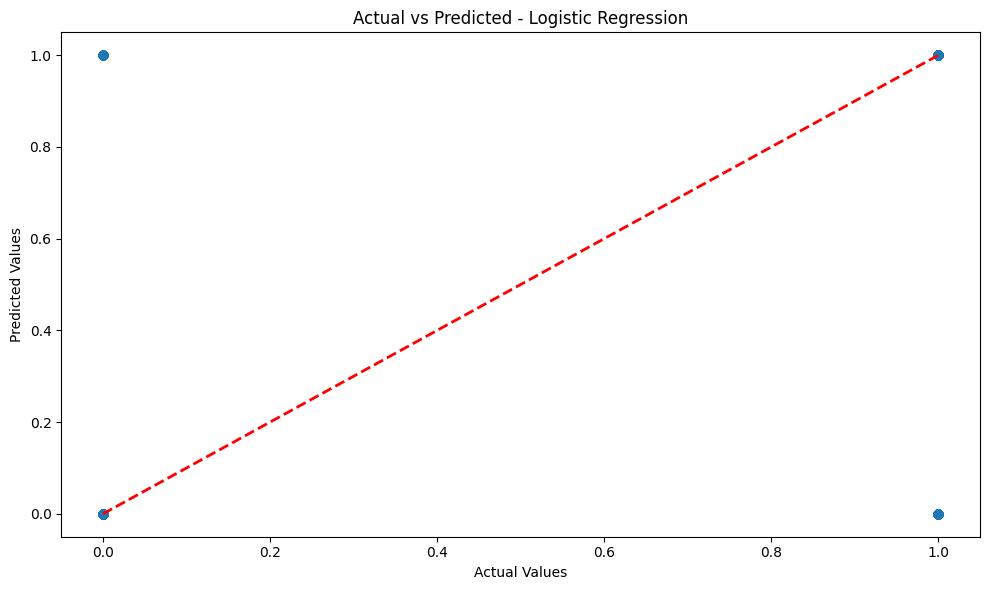

In [532]:
plot_actual_vs_predicted(y_test, logistic_y_pred, 'Logistic Regression')

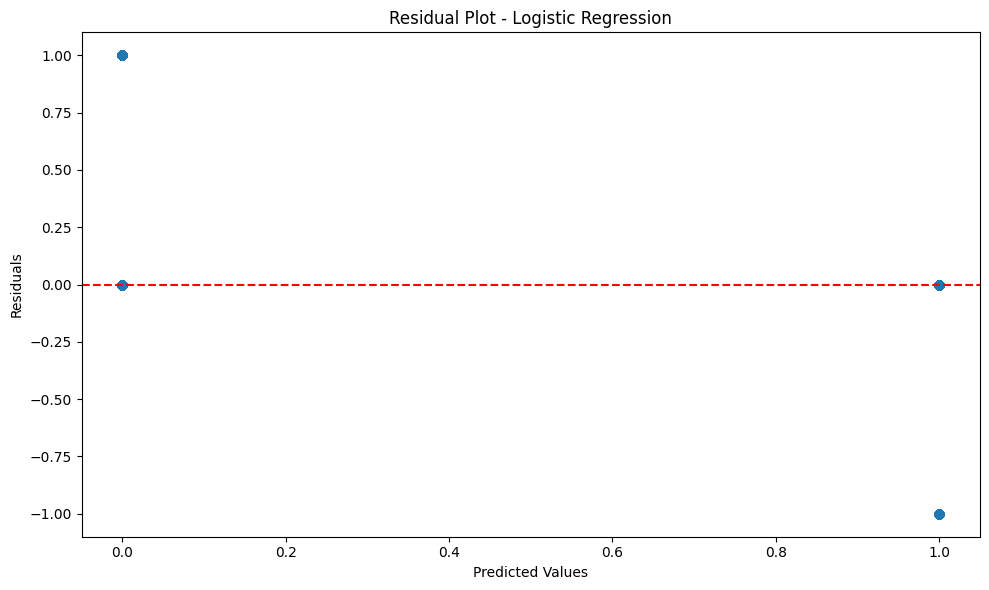

In [533]:
plot_residuals(y_test, logistic_y_pred, 'Logistic Regression')

#### Interpeting the results and coefficients for Logistic Regression

Our logistic regression model shows a good enough performance (that can definitely be improved) based on the following metrics:

- A precision of 0.69 means that when the model predicts a customer will churn, it is correct about 69% of the time, which may not be good enough if the company's goal requires being highly confident in churn predictions
- A recall of 0.590 indicates that the model captures 59% of all actual churn cases, which relatively low, especially if the company's goal requires catching more true churn cases, suggesting some room for improvement in identifying customers who will churn
- An accuracy of 0.821 means that the model correclty classifies about 82.1% of the churning cases, which is a decent overall performance. To be specific, 82.1% indicates the overall proportion of correct predictions. However, it is important to note that accuracy can be misleading if the classes are imbalanced, which is the case here since we have many more customers that do not churn than those that churn. 

To analyze our coefficients, let's look at the positive and negative coefficients. 
- Positive Coefficients
	- Contract_Month-to-Month (0.334): Customers with a month-to-month contract are significantly more likely to churn compared to those on longer contracts. This is intuitive since month-to-month customers have fewer contractual obligations.
	- InternetService_Fiber optic (0.334): Customers with fiber optic service are more likely to churn compared to those with no internet or DSL. This could raise questions about the quality of fiber optic service or its pricing.
	- PaperlessBilling (0.170): Surprisingly, customers using paperless billing are more likely to churn, which could be counterintuitive, as paperless billing is often seen as convenient.
	- StreamingTV_Yes (0.172): This indicates that customers who use the streaming TV service are more likely to churn, possibly because of dissatisfaction with the service.

- Negative Coefficients:
	- tenure (-0.791): This is the most impactful feature in reducing churn. As tenure increases, customers are much less likely to churn, which makes sense since long-standing customers tend to be more loyal
	- Contract_Two year (-0.331): Customers with two-year contracts are less likely to churn, likely because of longer-term commitment, which aligns with the fact that the model assigned a positive coefficient to the month-to-month contract type
	- StreamingMovies_No (-0.173): Customers who do not use streaming movies are less likely to churn, which might indicate that customers not enrolled in extra services are more satisfied with the core services
	- PhoneService (-0.100): Customers with phone service are less likely to churn

Features with coefficients close to zero (like gender, Partner, and TechSupport_Yes) have very little impact on churn in this model. This suggests these variables are not particularly useful in predicting churn. We should explore if these features would provide better values when combined with other predictors (through interaction terms or derived features)

While the model performs reasonably well in terms of accuracy, precision, and recall, the presence of some unexpected signs (e.g., OnlineBackup_No and OnlineBackup_Yes both being positive) and some class imbalance suggests that further feature engineering or even regularization could improve the interpretability and performance of the model

# Generalized Additive Model (GAM)

In [534]:
from pygam import LogisticGAM

In [535]:
def evaluate_gam_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)  
    acc_score = accuracy_score(y_test,y_pred) 
    
    print(f"\n{model_name}:")
    print(f"Precision: {precision:.3f}")
    print(f"Recall Score: {recall:.3f}")
    print(f"Accuracy Score: {acc_score:.3f}")
    
  
    return model, y_pred

The code to create and train the logistic GAM was inspired from the code provided by Dr.Brinnae Bent (Source: https://github.com/AIPI-590-XAI/Duke-AI-XAI/blob/main/interpretable-ml-example-notebooks/generalized-models-interpretability.ipynb)

In [536]:
# Initilize GAM
gam = LogisticGAM()

# Find best smoothing parameters for each spline term
gam.gridsearch(X_train_scaled, y_train)

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  9% (1 of 11) |##                       | Elapsed Time: 0:00:02 ETA:   0:00:25
 18% (2 of 11) |####                     | Elapsed Time: 0:00:04 ETA:   0:00:18
 27% (3 of 11) |######                   | Elapsed Time: 0:00:05 ETA:   0:00:15
 36% (4 of 11) |#########                | Elapsed Time: 0:00:07 ETA:   0:00:13
 45% (5 of 11) |###########              | Elapsed Time: 0:00:09 ETA:   0:00:11
 54% (6 of 11) |#############            | Elapsed Time: 0:00:10 ETA:   0:00:09
 63% (7 of 11) |###############          | Elapsed Time: 0:00:12 ETA:   0:00:07
 72% (8 of 11) |##################       | Elapsed Time: 0:00:14 ETA:   0:00:05
 81% (9 of 11) |####################     | Elapsed Time: 0:00:15 ETA:   0:00:03
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:17 ETA:   0:00:01
100% (11 of 11) |########################| Elapsed Time: 0:00:19 Time:  0:00:19


LogisticGAM(callbacks=[Deviance(), Diffs(), Accuracy()], 
   fit_intercept=True, max_iter=100, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) + s(17) + s(18) + s(19) + s(20) + s(21) + s(22) + s(23) + s(24) + intercept,
   tol=0.0001, verbose=False)

In [537]:
gam, gam_y_pred  = evaluate_gam_model(gam, X_train_scaled, X_test_scaled, y_train, y_test, 'Logistic GAM')


Logistic GAM:
Precision: 0.679
Recall Score: 0.568
Accuracy Score: 0.815


Let's now use the Breusch–Pagan Test to check for Homoscedasticity. I learned about the existence and significance of this test by asking Claude Heroku. The code for this test was written with the help of Claude Heroku.

The Breusch–Pagan test checks if the residuals of a model have constant variance (homoscedasticity). In other words, it tests whether the residuals’ variance depends on the values of the predictor variables.

In [538]:
from statsmodels.stats.diagnostic import het_breuschpagan

residuals = y_test - gam_y_pred
# Breusch-Pagan test
# Add constant to features matrix (X)
X_test_with_const = sm.add_constant(X_test)

# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(residuals, X_test_with_const)

# The test returns four values:
# Lagrange Multiplier statistic, p-value, f-value, and f p-value
lm_stat, lm_pvalue, f_stat, f_pvalue = bp_test

print(f"Lagrange Multiplier p-value: {lm_pvalue}")
print(f"F-statistic p-value: {f_pvalue}")

Lagrange Multiplier p-value: 9.938529292541596e-24
F-statistic p-value: 2.0740060715919043e-28


Since the p-values are extremely small (<0.05), we can assume that heteroscedasticity is present (i.e., the variance of residuals is not constant), thereby violating our assumption of homoscedasticity.

#### Interpreting the Logistic GAM results

Our logistic GAM model shows a good enough performance (that can definitely be improved) based on the following metrics:
Precision: 0.679
Recall Score: 0.568
Accuracy Score: 0.815
- A precision of 0.679 means that when the model predicts a customer will churn, it is correct about 67.9% of the time, which may not be good enough if the company's goal requires being highly confident in churn predictions
- A recall of 0.568 indicates that the model captures 56.8% of all actual churn cases, which relatively low, especially if the company's goal requires catching more true churn cases, suggesting some room for improvement in identifying customers who will churn
- An accuracy of 0.815 means that the model correclty classifies about 81.5% of the churning cases, which is a decent overall performance. To be specific, 81.5% indicates the overall proportion of correct predictions. However, it is important to note that accuracy can be misleading if the classes are imbalanced, which is the case here since we have many more customers that do not churn than those that churn. 

The GAM model is less interpretable compared to the linear and logistic regression models since it does not represent each feature with a single coefficient, rather by a set of basis functions that allow the model to capture non-linear relationships. To interpret this model, let's look into the partial dependence plots 

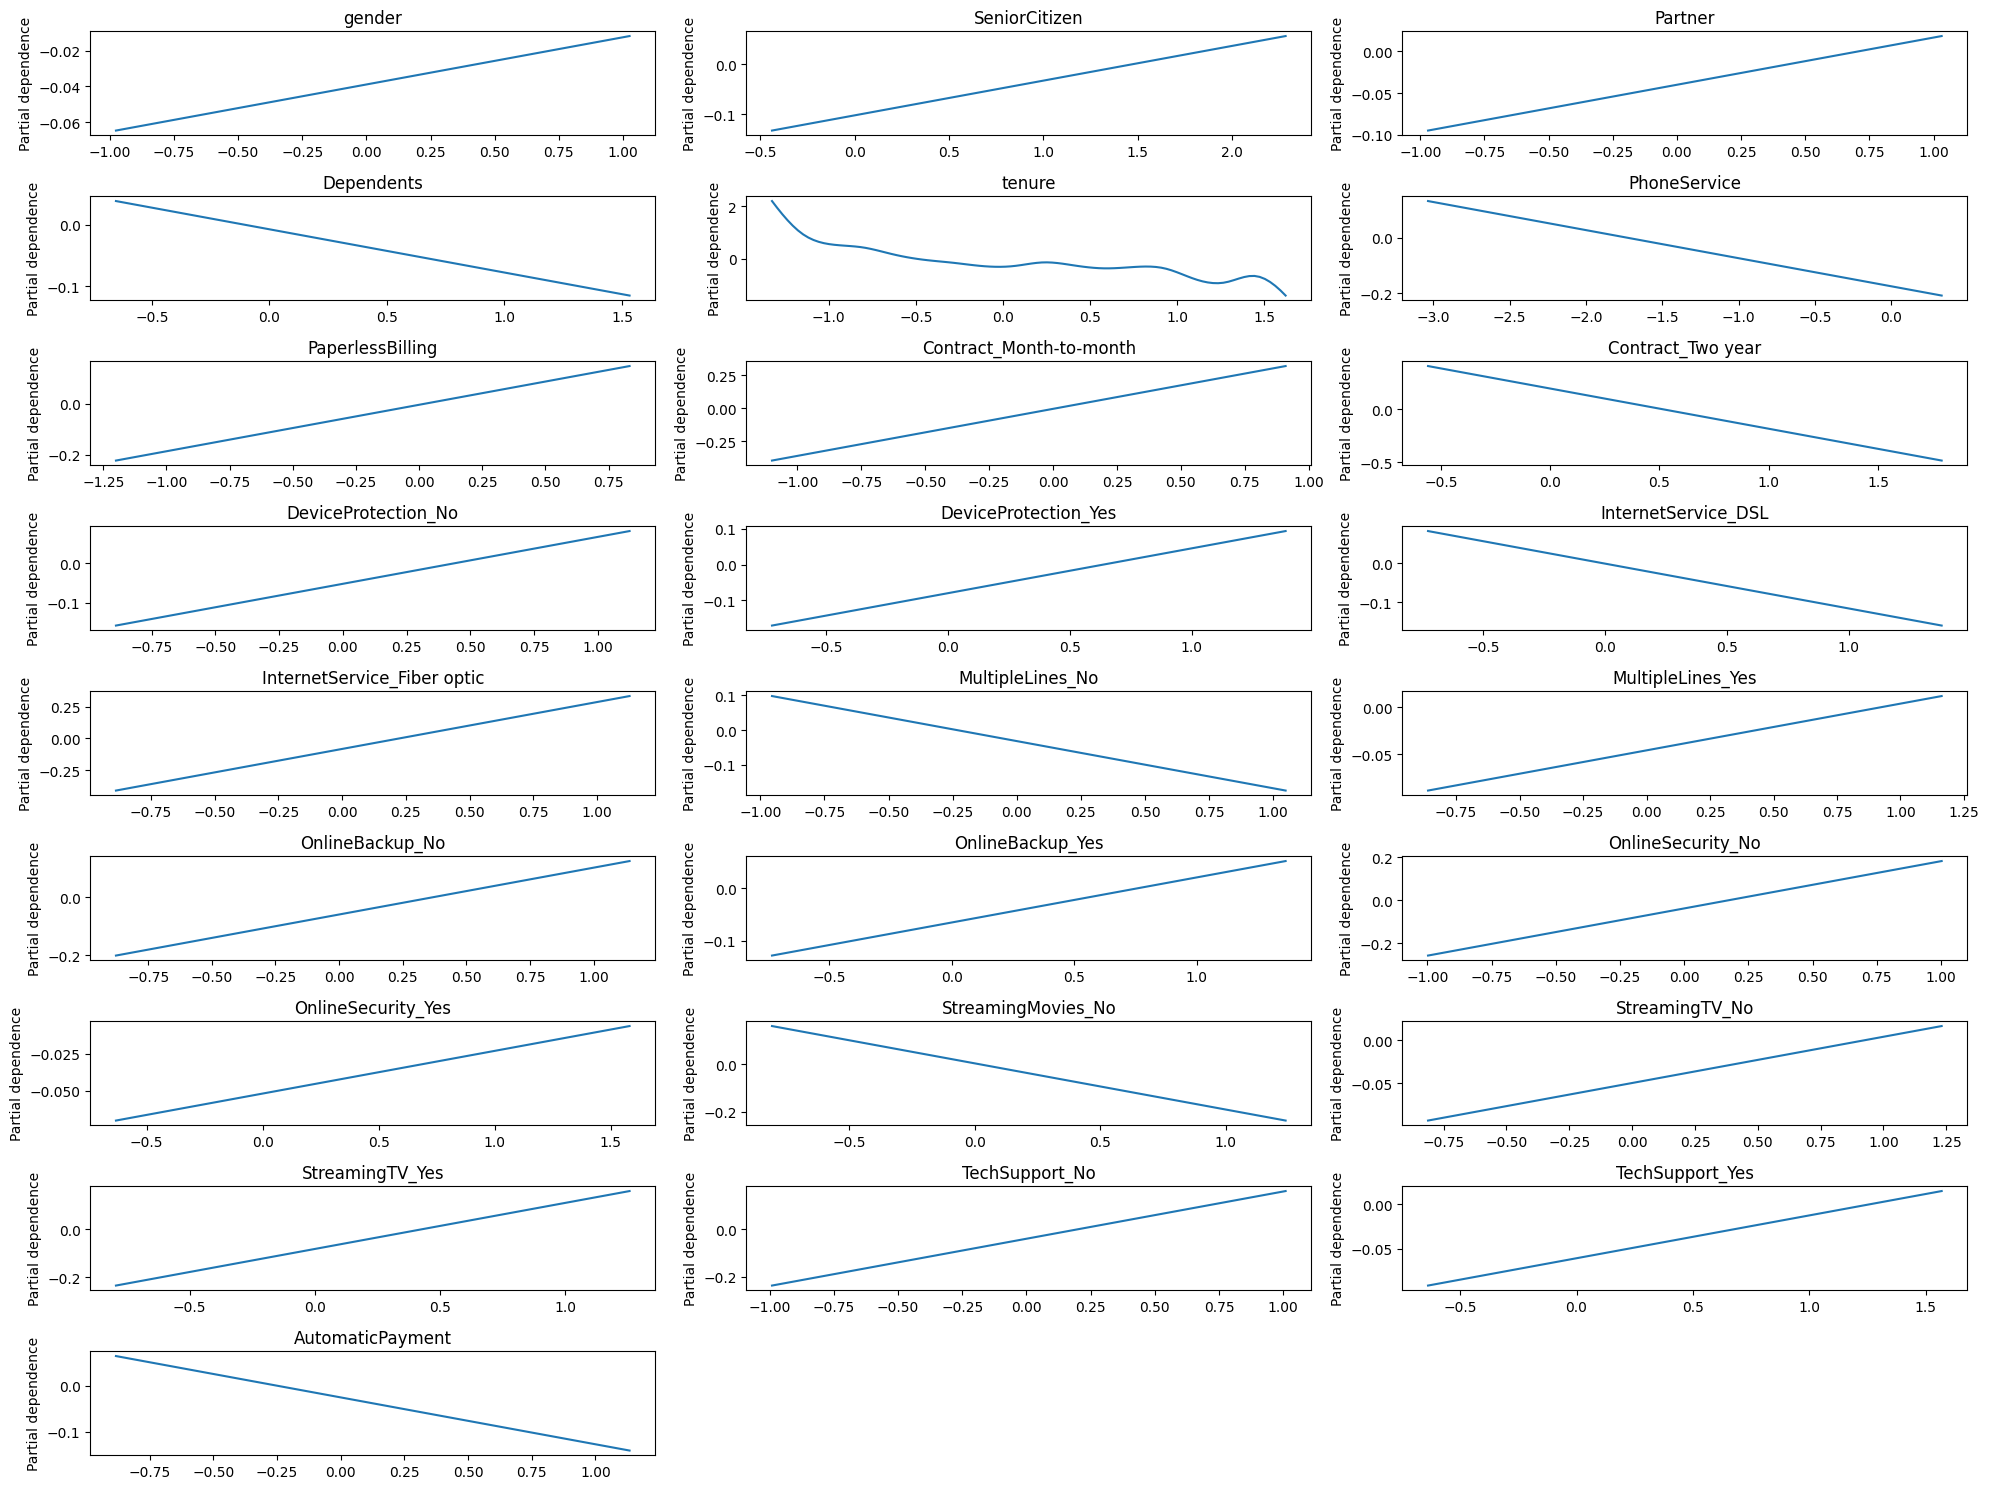

In [539]:
# Visualize GAM
plt.figure(figsize=(20, 15))
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    plt.subplot(9, 3, i+1)
    XX = gam.generate_X_grid(term=i)
    plt.plot(XX[:, term.feature], gam.partial_dependence(term=i, X=XX))
    plt.title(X.columns[i])
    plt.ylabel('Partial dependence')

plt.tight_layout()
plt.show()

- We can see that the tenure has a non-linear relationship with the predicted value. With a sharp increase intitially, then leveling off, indicating that past a certain amount of time, tenure doesn't affect churning as much. 
- We can also see how having a month-to-month contract has a positive effect on churning, confirming our findings from the previous models (similar to having a yearly contract, which in this case has a negative effect) 
- InternetService_Fiber optic has a strong positive effect as the value increases, which aligns with our findings from the previous models and the p-value associated with it

The gam summary provides us with the diffent p-values, giving us insights to the significance of each feature's contribution (feature function, which the sum of all the basis functions associated with that feature)

In [540]:
gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     30.4513
Link Function:                        LogitLink Log Likelihood:                                 -2309.4191
Number of Samples:                         5634 AIC:                                             4679.7408
                                                AICc:                                            4680.1052
                                                UBRE:                                               2.8349
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.2918
Feature Function                  Lam

/var/folders/b7/2dqsctv50sbgk3bg9gpz453c0000gn/T/ipykernel_2253/3358381670.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


- Highly Significant Features (p < 0.001):
	- tenure (s(4)): p-value = 0.00e+00
	- PhoneService (s(5)): p-value = 1.20e-03
	- PaperlessBilling (s(6)): p-value = 5.21e-05
	- Contract_Month-to-month (s(7)): p-value = 1.52e-08
	- Contract_Two year (s(8)): p-value = 1.59e-07
	- InternetService_Fiber optic (s(12)): p-value = 0.00e+00
	- OnlineSecurity_No (s(17)): p-value = 0.00e+00
These features have a high statistical significance, indicating they have a meaningful effect on churning. Some of these features' importance in predicting the target variable are consistent across all models such as tenure, InternetService-Fiber Optic and contract_month-to-month. It is interesting to note how Online_security_no is extremely significant in this model, which is different from our other models. 

- Moderately Significant Features (p < 0.05):
	- OnlineBackup_Yes (s(16)): p-value = 2.46e-03
	- MultipleLines_No (s(13)): p-value = 6.32e-05
	- StreamingMovies_No (s(19)): p-value = 5.56e-05
	- TechSupport_Yes (s(23)): p-value = 1.62e-01
These features are statistically significant but to a lesser extent compared to those with lower p-values. Their impact is less dominant in predicting churning. Some of these features such as OnlineBackup_Yes are consistently significant across all of our models.
- Not Significant (p > 0.05):
	- gender (s(0)): p-value = 7.71e-01
	- SeniorCitizen (s(1)): p-value = 1.03e-01
	- Partner (s(2)): p-value = 4.26e-01
	- Dependents (s(3)): p-value = 2.92e-01
	- MultipleLines_Yes (s(14)): p-value = 3.15e-01
	- OnlineSecurity_Yes (s(18)): p-value = 5.28e-01
	- StreamingTV_No (s(20)): p-value = 1.07e-01
	- TechSupport_Yes (s(23)): p-value = 1.62e-01
These features are not significant in predicting churning. Features like gender and seniorCitizen have been consistently unsignificant to all of our models. In order to increase our models performances, getting rid of these features during feature selection (or combining them) may lead to increased performance

## Model Comparison

- Linear Regression
    - Strengths 
        - The coefficients are easy to interpret
        - The importance of each feature can be inferred from the magnitude of each coefficient, where low values of coefficients indicate insignificance to the target value 
    - Weaknesses 
        - In our case, given that our target variable is binary, linear regression was not great at capturing the variance in the target value. 
        - The model assumes a linear relationship between features and the target variable, which is not necessarily the case for our dataset, especially that most of our features are categorical
        - Cannot capture interactions between features unless explicitely included as interaction terms 
=> Linear Regression is simple, but is not appropriate for binary targets

- Logistic Regression 
    - Strengths
        - The coefficients are easy to interpret, although a bit more complicated than the linear regression's coefficients since we are dealing with log-odds now. The underlying principle is the same though. 
        - Just like with linear regression, the importance of each feature can be inferred from the magnitude of each coefficient, where low values of coefficients indicate insignificance to the target value 
        - In our case, given that our target variable is binary, logistic regression provided better insights and better performance 
    - Weaknesses
        - The model assumes a linear relationship between features and the log-odds target variable, which is not necessarily the case for all features in our dataset as we saw 
        - Cannot capture interactions between features unless explicitely included as interaction terms 
=> Logistic Regression offers straightforward interpretability but may miss complex relationships

- GAM
    - Strengths
        - Can capture non-linear relationships, which is more realistic since most relationships in the world are not linear 
        - Can automatically capture some interactions using the basis functions 
    - Weaknesses
        - More complex and less interpretable compared to the other two models. However, using partial dependency plots and the p-values generated in the summary, we can still understand the significance of each feature in determining whether customers are churning 
=> Gam provides a good balance between flexibility and interpretability, capturing non-linear relationships while still allowing feature-level interpretation, by using dependency plots for example



Since our goal is to predict the factors that contribute the most to churn, while keeping in mind interpretability, we should go with logistic regression. It is true that the GAM model can capture interactions automatically, unlike the logistic regression model that requires them to be explicitely included. However, given that the models' performance are very similar, the increased complexity of the GAM model may not be justified. Using Linear Regression in our case is not appropriate since our target value is binary. As we saw earlier, there was a significance in the magnitude associated to the features between all models, with linear regression assigning the smallest coefficients.

Note: this conclusion may change, leaning towards GAM, if better feature selection was applied.